<div style="color:white;display:fill;border-radius:8px;
            background-color:#a7d5ed;font-size:170%;
            font-family:Nexa;letter-spacing:4.5px;">    
    <h1 style="padding:15px;color:black;text-align: center"> Feature Engineering </h1> 
</div>

![](img/header.png)

<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> OBJETIVO </h1>    
</div>

O objetivo neste notebook é criação novas variáveis (features) que possam ajudar na identificação de novos padrões, com a finalidade de bater a baseline estabelecida no [notebook anterior](https://github.com/rogeriodelfim/Competicoes/blob/main/Flai/10/02%20-%20Features%20Engineering.ipynb) com XGBoost na competição. 



<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 1. IMPORTAÇÕES </h1>    
</div>

## 1.1. Instalações

In [1]:
COLAB = 'google.colab' in str(get_ipython()) 

if COLAB:        
    !pip install --q scikit-plot
    !pip install --q category_encoders
    !pip install --q shap
    !pip install --q inflection    
    !pip install --q catboost
    !pip install --q colorama
    !pip install --q tensorflow
    !pip install --q wandb
    !pip install --q eli5
    #!pip install --q optbinning
    #!pip install --q catboost
    #!pip install --q pandas-profiling
    #!pip install --q pycaret
        
    from google.colab import drive
    drive.mount('/content/drive')

## 1.2. Bibliotecas 

In [2]:
import warnings
import random
import os
import gc
import torch
import sklearn.exceptions
import shap
import multiprocessing
import glob
import scipy.optimize 
import scipy.special

In [423]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt 
import seaborn           as sns
import joblib            as jb
import scipy.stats       as stats
import statsmodels.api   as sm
import xgboost           as xgb
import scikitplot        as skplt
import category_encoders as ce

In [4]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing   import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.preprocessing   import MaxAbsScaler, QuantileTransformer 
from sklearn.preprocessing   import PowerTransformer, Normalizer
from sklearn.preprocessing   import LabelBinarizer, OneHotEncoder, OrdinalEncoder
from sklearn                 import metrics
from sklearn.metrics         import ConfusionMatrixDisplay, confusion_matrix
from datetime                import datetime

In [5]:
from sklearn.cluster         import KMeans
from sklearn.decomposition   import PCA

In [6]:
from matplotlib.axes._axes   import _log as matplotlib_axes_logger
from sklearn.ensemble        import VotingRegressor
from sklearn.compose         import TransformedTargetRegressor
from sklearn.pipeline        import Pipeline
from scipy.stats             import skew, norm
from scipy.stats             import norm

In [7]:
from yellowbrick.cluster        import KElbowVisualizer, SilhouetteVisualizer
from sklearn.utils.class_weight import compute_sample_weight
from scipy                      import stats
from scipy.cluster              import hierarchy as hc
from math                       import factorial
from scipy.stats                import mode
from collections                import Counter
from sklearn.neighbors          import KNeighborsClassifier
#from optbinning                 import OptimalBinning

In [8]:
from yellowbrick.regressor       import ResidualsPlot
from yellowbrick.regressor       import PredictionError
from yellowbrick.model_selection import ValidationCurve

In [76]:
from datetime                  import datetime
from scipy.stats               import skew, norm
from collections               import Counter
from sklearn.model_selection   import RandomizedSearchCV, GridSearchCV
from sklearn.calibration       import CalibrationDisplay
from colorama                  import Fore, Back, Style
from sklearn.feature_selection import SelectPercentile, VarianceThreshold, SelectKBest, f_classif
from sklearn.pipeline          import Pipeline, make_pipeline, FeatureUnion

In [67]:
from sklearn.compose      import TransformedTargetRegressor
from sklearn.pipeline     import FeatureUnion, Pipeline, make_pipeline
from sklearn.base         import BaseEstimator, TransformerMixin

In [68]:
from sklearn.compose            import ColumnTransformer, make_column_transformer
from sklearn.pipeline           import Pipeline, make_pipeline, FeatureUnion
from sklearn.feature_selection  import VarianceThreshold
from sklearn.impute             import SimpleImputer
from scipy.stats                import chi2_contingency
from plotly.subplots            import make_subplots
from sklearn.base               import BaseEstimator, RegressorMixin, TransformerMixin, clone

In [87]:
from sklearn.metrics           import precision_score
from sklearn.metrics           import accuracy_score
from sklearn.metrics           import recall_score
from sklearn.metrics           import fbeta_score
from sklearn.metrics           import f1_score
from sklearn.metrics           import log_loss
from sklearn.impute            import SimpleImputer
from category_encoders          import TargetEncoder

In [124]:
from imblearn.over_sampling     import SMOTE
from imblearn.under_sampling    import RandomUnderSampler
from sklearn.ensemble           import RandomForestClassifier

In [415]:
from matplotlib.axes._axes     import _log as matplotlib_axes_logger
from sklearn.model_selection   import train_test_split, KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing     import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.preprocessing     import MaxAbsScaler, QuantileTransformer 
from sklearn.preprocessing     import PowerTransformer, Normalizer
from sklearn.preprocessing     import LabelBinarizer, OneHotEncoder, OrdinalEncoder
from sklearn                   import metrics
from sklearn.metrics           import make_scorer
from sklearn.metrics           import roc_auc_score, f1_score, log_loss, roc_curve, auc
from sklearn.metrics           import classification_report, confusion_matrix
from sklearn.mixture           import GaussianMixture, BayesianGaussianMixture

## 1.3. Funções

Abaixo foi criado uma classe com diversas funções, que será utilizada nos processos e modelagem.

In [109]:
class Utility():
        
    def __init__(self):
        self.name_ =''
       
    def jupyter_setting():
    
        %matplotlib inline

        #os.environ["WANDB_SILENT"] = "true" 
        #plt.style.use('bmh') 
        #plt.rcParams['figure.figsize'] = [20,15]
        #plt.rcParams['font.size']      = 13

        matplotlib_axes_logger.setLevel('ERROR')

        pd.options.display.max_columns = None
        #pd.set_option('display.expand_frame_repr', False)

        warnings.filterwarnings(action='ignore')
        warnings.simplefilter('ignore')
        warnings.filterwarnings('ignore')
        warnings.filterwarnings('ignore', category=DeprecationWarning)
        warnings.filterwarnings('ignore', category=FutureWarning)
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        warnings.filterwarnings('ignore', category=UserWarning)
        warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
        warnings.filterwarnings("ignore", category= sklearn.exceptions.UndefinedMetricWarning)
        warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

        pd.options.mode.chained_assignment = None 
        pd.set_option('display.max_rows', 200)
        pd.set_option('display.max_columns', 500)
        pd.set_option('display.max_colwidth', 200)

        icecream = ["#00008b", "#960018","#008b00", "#00468b", "#8b4500", "#582c00"]
        #sns.palplot(sns.color_palette(icecream))

        colors = ["lightcoral", "sandybrown", "darkorange", "mediumseagreen",
              "lightseagreen", "cornflowerblue", "mediumpurple", "palevioletred",
              "lightskyblue", "sandybrown", "yellowgreen", "indianred",
              "lightsteelblue", "mediumorchid", "deepskyblue"]

        # Colors
        dark_red   = "#b20710"
        black      = "#221f1f"
        green      = "#009473"
        myred      = '#CD5C5C'
        myblue     = '#6495ED'
        mygreen    = '#90EE90'    
        color_cols = [myred, myblue,mygreen]

        return icecream, colors, color_cols

    def missing_zero_values_table(self, df):
        
        mis_val         = df.isnull().sum()
        mis_val_percent = round(df.isnull().mean().mul(100), 2)
        mz_table        = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table        = mz_table.rename(columns = {df.index.name:'col_name', 
                                                     0 : 'Valores ausentes', 
                                                     1 : '% de valores totais'})
        
        mz_table['Tipo de dados'] = df.dtypes
        mz_table                  = mz_table[mz_table.iloc[:,1] != 0 ]. \
                                     sort_values('% de valores totais', ascending=False)
        
        msg = "Seu dataframe selecionado tem {} colunas e {} " + \
              "linhas. \nExistem {} colunas com valores ausentes."
            
        print (msg.format(df.shape[1], df.shape[0], mz_table.shape[0]))
        
        return mz_table.reset_index()
    
    def reduce_memory_usage(self, df, verbose=True):
    
        numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
        start_mem = df.memory_usage().sum() / 1024 ** 2

        for col in df.columns:

            col_type = df[col].dtypes

            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == "int":
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if (
                        c_min > np.finfo(np.float16).min
                        and c_max < np.finfo(np.float16).max
                    ):
                        df[col] = df[col].astype(np.float16)
                    elif (
                        c_min > np.finfo(np.float32).min
                        and c_max < np.finfo(np.float32).max
                    ):
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
        end_mem = df.memory_usage().sum() / 1024 ** 2
        if verbose:
            print(
                "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                    end_mem, 100 * (start_mem - end_mem) / start_mem
                )
            )

        return df
    
    def graf_label(self, ax, total):

         for i in ax.patches:
            # get_width pulls left or right; get_y pushes up or down
            width, height = i.get_width() -.2 , i.get_height()

            x, y  = i.get_xy()  
            color = 'white'
            alt   = .5
            soma  = 0 

            if height < 70:
                color = 'black'
                alt   = 1
                soma  = 10

            ax.annotate(str(round((i.get_height() * 100.0 / total), 1) )+'%', 
                        (i.get_x()+.55*width, 
                         i.get_y()+soma + alt*height),
                         color   = color,
                         weight = 'bold',
                         size   = 14)
            
    def graf_bar(self, df, col, title, xlabel, ylabel, tol = 0):
    
        #ax    = df.groupby(['churn_cat'])['churn_cat'].count()
        ax     = df    
        colors = col

        if tol == 0: 
            total  = sum(ax)
            ax = (ax).plot(kind    ='bar',
                           stacked = True,
                           width   = .5,
                           rot     = 0,
                           color   = colors, 
                           grid    = False)
        else:
            total  = tol     
            ax = (ax).plot(kind    ='bar',
                           stacked = True,
                           width   = .5,
                           rot     = 0,
                           figsize = (10,6),
                           color   = colors,
                           grid    = False)

        title   = title #+ ' \n'
        xlabel  = '\n ' + xlabel 
        ylabel  = ylabel + ' \n'

        ax.set_title(title  , fontsize=22)
        ax.set_xlabel(xlabel, fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)    

        min = [0,23000000]
        #ax.set_ylim(min)
        self.graf_label(ax, total)

    def correlation(self, df_, threshold_):
        col_corr    = set()  
        corr_matrix = df_.corr()
        
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > threshold_: 
                    colname = corr_matrix.columns[i]  
                    col_corr.add(colname)
                    
        return col_corr

    def __graf_fature_corr(df_, annot_=False, threshold_=.8, print_var_=False, 
                         print_graf_=True, mask_=True, title_='', method_='pearson'):
        
        msg_title = '\n Correlação das variável {} -{} \n'.format(title_, 'method_')
        
        df = df_.copy().corr(method =method_).round(5)
        
        if print_graf_: 
            # Máscara para ocultar a parte superior direita do gráfico, pois é uma duplicata
            mask = np.zeros_like(df)
            mask[np.triu_indices_from(mask)] = mask_
            
            # Making a plot
            ax = sns.heatmap(df, annot=annot_, 
                             mask=mask, 
                             cmap="RdBu", 
                             annot_kws={"weight": "bold", "fontsize":13}                              
                            )

            ax.set_title(msg_title, fontsize=17)
            
            plt.setp(ax.get_xticklabels(), 
                     rotation      = 90, 
                     ha            = "right",
                     rotation_mode = "anchor", 
                     weight        = "normal", style = 'whitegrid', palette= 'pastel')

            plt.setp(ax.get_yticklabels(), 
                     weight        = "normal",
                     rotation_mode = "anchor", 
                     rotation      = 0, 
                     ha            = "right", style = 'whitegrid', palette= 'pastel')
            
            
            
            plt.show();
            
            
            
        if print_var_:         
            df_corr = df[abs(df)>threshold_][df!=1.0].unstack().dropna().reset_index()
            if len(df_corr)>0:            
                print('Variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
                df_corr.columns =  ['var_1', 'var_2', 'corr']
                display(df_corr)
            else: 
                print('Não tem variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
        
        #sns.set(style="darkgrid")
        plt.show();
                        
    def describe(self, df):
        var = df.columns

        # Medidas de tendência central, média e mediana 
        ct1 = pd.DataFrame(df[var].apply(np.mean)).T
        ct2 = pd.DataFrame(df[var].apply(np.median)).T

        # Dispensão - str, min , max range skew, kurtosis
        d1 = pd.DataFrame(df[var].apply(np.std)).T
        d2 = pd.DataFrame(df[var].apply(min)).T
        d3 = pd.DataFrame(df[var].apply(max)).T
        d4 = pd.DataFrame(df[var].apply(lambda x: x.max() - x.min())).T
        d5 = pd.DataFrame(df[var].apply(lambda x: x.skew())).T
        d6 = pd.DataFrame(df[var].apply(lambda x: x.kurtosis())).T
        d7 = pd.DataFrame(df[var].apply(lambda x: (3 *( np.mean(x) - np.median(x)) / np.std(x) ))).T

        # concatenete 
        m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6, d7]).T.reset_index()
        m.columns = ['attrobutes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis','coef_as']

        return m

    def graf_outlier(self, df, feature):
        col = [(0,4), (5,9)]

        df_plot = ((df[feature] - df[feature].min())/
                   (df[feature].max() - df[feature].min()))

        fig, ax = plt.subplots(len(col), 1, figsize=(15,7))

        for i, (x) in enumerate(col): 
            sns.boxplot(data = df_plot.iloc[:, x[0]:x[1] ], ax = ax[i]); 

    def diff(self, t_a, t_b):
        from dateutil.relativedelta import relativedelta
        t_diff = relativedelta(t_b, t_a)  # later/end time comes first!
        return '{h}h {m}m {s}s'.format(h=t_diff.hours, m=t_diff.minutes, s=t_diff.seconds)
    
    def free_gpu_cache(self):

        # https://www.kaggle.com/getting-started/140636
        #print("Initial GPU Usage")
        #gpu_usage()                             

        #cuda.select_device(0)
        #cuda.close()
        #cuda.select_device(0)   

        gc.collect()
        torch.cuda.empty_cache()

    def graf_eval(self):

        results     = model.evals_result()
        ntree_limit = model.best_ntree_limit

        plt.figure(figsize=(20,7))

        for i, error in  enumerate(['mlogloss', 'merror']):#

            plt.subplot(1,2,i+1)
            plt.plot(results["validation_0"][error], label="Treinamento")
            plt.plot(results["validation_1"][error], label="Validação")

            plt.axvline(ntree_limit, 
                        color="gray", 
                        label="N. de árvore ideal {}".format(ntree_limit))


            title_name ='\n' + error.upper() + ' PLOT \n'
            plt.title(title_name)
            plt.xlabel("Número de árvores")
            plt.ylabel(error)
            plt.legend();

    def linear_fit_slope(self, y):
        """Return the slope of a linear fit to a series."""
        y_pure = y.dropna()
        length = len(y_pure)
        x = np.arange(0, length)
        slope, intercept = np.polyfit(x, y_pure.values, deg=1)
        return slope

    def linear_fit_intercept(self, y):
        """Return the intercept of a linear fit to a series."""
        y_pure = y.dropna()
        length = len(y_pure)
        x = np.arange(0, length)
        slope, intercept = np.polyfit(x, y_pure.values, deg=1)
        return intercept

    def cromer_v(self, x, y):
        cm       = pd.crosstab(x, y).to_numpy()        
        n        = cm.sum()
        r, k     = cm.shape
        chi2     = stats.chi2_contingency(cm)[0]
        chi2corr = max(0, chi2 - (k-1) * (r-1) /(n-1))
        kcorr    = k - (k-1) **2/(n-1)
        rcorr    = r - (r-1) **2/(n-1)    
        v        = np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))        
        return v  

    def generate_category_table(self, data):

        cols    = data.select_dtypes(include='object').columns
        dataset = pd.DataFrame()

        for i in cols:
            corr = []
            for x in cols: 
                corr.append(self.cromer_v(data[i],data[x]))

            aux     = pd.DataFrame({i:corr})
            dataset = pd.concat([dataset, aux], axis=1) 

        return dataset.set_index(dataset.columns)
            
    def graf_feature_corr(self, df_, annot_=False, threshold_=.8, print_var_=False, 
                          print_graf_=True, mask_=True, title_='', method_='pearson'):

        df = df_.corr(method=method_).round(5)

        if print_graf_: 
            # Máscara para ocultar a parte superior direita do gráfico, pois é uma duplicata
            mask = np.zeros_like(df)
            mask[np.triu_indices_from(mask)] = mask_

            sns.set(style="whitegrid", palette="pastel") 
            
            # Making a plot
            ax = sns.heatmap(df, annot = annot_, 
                             mask      = mask, 
                             cmap      = "RdBu", 
                             fmt       = ".2f",
                             annot_kws = {"weight": "bold", "fontsize":10}
                            )
            
            ax.set_title("\n Correlação das variável {} - {} \n".format(title_, method_.upper()), fontsize=17)

            plt.setp(ax.get_xticklabels(), 
                     rotation      = 90, 
                     ha            = "right",
                     rotation_mode = "anchor", 
                     weight        = "normal")

            plt.setp(ax.get_yticklabels(), 
                     weight        = "normal",
                     rotation_mode = "anchor", 
                     rotation      = 0, 
                     ha            = "right")
            
            sns.set(style="darkgrid")

            plt.show();

        if print_var_:         
            df_corr = df[abs(df)>threshold_][df!=1.0].unstack().dropna().reset_index()
            if len(df_corr)>0:            
                print('Variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
                df_corr.columns =  ['var_1', 'var_2', 'corr']
                display(df_corr)
            else: 
                print('Não tem variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
                
        return self.correlation(df_, threshold_)

    def plot_roc_curve(self, fpr, tpr, label=None):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "r-", label=label)
        ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for FLAI 08')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.grid(True)

    def feature_engineering(self, df_):

        var_f27 = ''
        for col in df_['f_27']: 
            var_f27 +=col

        var_f27 = list(set(var_f27))
        var_f27.sort()

        df_["fe_f_27_unique"] = df_["f_27"].apply(lambda x: len(set(x)))

        for letra in var_f27:             
            df_['fe_' + letra.lower() + '_count'] = df2_train["f_27"].str.count(letra)

        return df_ 

    def identifies_outliers(self, df):

        cols_num = df.select_dtypes(np.number).columns

        for col in cols_num: 
            if col != 'unnamed':            
                Q1  = df[col].quantile(0.25)
                Q3  = df[col].quantile(0.75)
                IQR = Q3-Q1
                lowqe_bound=Q1 - 1.5 * IQR
                upper_bound=Q3 + 1.5 * IQR

                df['outliers_'+ col] = 0
                df['outliers_'+ col][(df[col]<=lowqe_bound)|(df[col]>=upper_bound)] = 1    

                df[col] = np.where(df[col] > df[col].quantile(0.95),
                                                df[col].median(),
                                                df[col])

    def evaluation(self, y_, predictions_, smape_base_=100):
        from sklearn import metrics
        mae   = metrics.mean_absolute_error(y_, predictions_)
        mse   = metrics.mean_squared_error(y_, predictions_)
        rmse  = metrics.mean_squared_error(y_, predictions_, squared=False) 
        mape  = metrics.mean_absolute_percentage_error(y_, predictions_)
        smape = self.smape(y_, predictions_)
        r2    = metrics.r2_score(y_, predictions_)    
        return rmse, mae, mse, mape, r2, smape
    
    def feature_statistic(self, df, feature_float, feature_cat=None):
        df['fe_mean']        = df[feature_float].mean(axis=1)   
        df['fe_std']         = df[feature_float].std(axis=1)   
        df['fe_median']      = df[feature_float].median(axis=1)   
        df['fe_var']         = df[feature_float].var(axis=1) 
        df['fe_min']         = df[feature_float].min(axis=1)   
        df['fe_max']         = df[feature_float].max(axis=1)   
        df['fe_skew']        = df[feature_float].skew(axis=1)   
        df['fe_quantile_25'] = df[feature_float].quantile(q=.25, axis=1)
        df['fe_quantile_50'] = df[feature_float].quantile(q=.5, axis=1)
        df['fe_quantile_75'] = df[feature_float].quantile(q=.75, axis=1)
        
        if feature_cat is not None:
            df['fe_dammy_count'] = df[feature_cat].sum(axis=1)   
        
        return df
    
    def gridSearchCV(self, model_, params_, X_train_, y_train_):
        """
        @param    model: sklearn estimator
        @param    params (dict): Dictionary of possible parameters

        @return   cv_results (DataFrame)
        """
        model_cv = GridSearchCV(model_, param_grid=params_, scoring='roc_auc', cv=5)
        model_cv.fit(X_train_, y_train_)
        cv_results = pd.DataFrame(model_cv.cv_results_)[['params', 'mean_test_score']]

        return cv_results
    
    def evaluate(self, model,X_train_, y_train_, X_test_, plotROC=False):

        model.fit(X_train_, y_train_)
        probs = model.predict_proba(X_train_)
        preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(y_train_, preds)
        roc_auc = auc(fpr, tpr)
        print(f'AUC: {roc_auc:.4f}')

        rocDf = pd.DataFrame({'fpr': fpr, 'tpr':tpr, 'threshold':threshold})
        rocDf['tpr - fpr'] = rocDf.tpr - rocDf.fpr
        optimalThreshold = rocDf.threshold[rocDf['tpr - fpr'].idxmax()]

        y_pred = np.where(preds >= optimalThreshold, 1, 0)

        # Plot ROC AUC
        if plotROC:
            plt.title('Receiver Operating Characteristic')
            plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
            plt.legend(loc = 'lower right')
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')
            plt.show()    

    def iqr_outliers(self, df,ft):

        q1  = df[ft].quantile(0.25)
        q3  = df[ft].quantile(0.75)
        iqr = q3-q1
        c   = 0 

        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr

        for i in range(len(df[ft])):
            if df[ft][i] > Upper_tail or df[ft][i] < Lower_tail:
                c+=1
        return c
    
    def outlier_create_feature_check(self, df_tr_, df_ts_, cols_=[], qt_inferior_=.25, qt_superior_=.75, 
                                     flg_ts_=True, input_limete_=False, verbose_=True):
    
        col_oltlier         = 'fe_outlier'
        df_tr_[col_oltlier] = 0 
        df_ts_[col_oltlier] = 0 

        for c in cols_:

            percentil25 = df_tr_[c].quantile(qt_inferior_)
            percentil75 = df_tr_[c].quantile(qt_superior_)

            iqr= percentil75 - percentil25 

            limite_inferior = percentil25 - 1.5 * iqr
            limite_superior = percentil75 + 1.5 * iqr

            df_tr_[col_oltlier][df_tr_[c]>limite_superior] = 1
            df_tr_[col_oltlier][df_tr_[c]<limite_inferior] = 1

            if input_limete_:
                df_tr_[c][df_tr_[c]>limite_superior] = limite_superior
                df_tr_[c][df_tr_[c]<limite_inferior] = limite_inferior

            if flg_ts_:
                df_ts_[col_oltlier][df_ts_[c]>limite_superior] = 1
                df_ts_[col_oltlier][df_ts_[c]<limite_inferior] = 1
                
                if input_limete_:
                    df_ts_[c][df_ts_[c]>limite_superior] = limite_superior
                    df_ts_[c][df_ts_[c]<limite_inferior] = limite_inferior

            if verbose_:
                print('Com a variável {}'.format(c))
                print(df_tr_[col_oltlier].value_counts())
                print()

        return df_tr_, df_ts_
        
    def calibrated_classifier_graf_model(self, mdl_list_, X_, y_, seed_=12359, figsize_=(10, 10), verbose_=False): 

        fig = plt.figure(1, figsize=figsize_)
        ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
        
        if verbose_: ax2 = plt.subplot2grid((3, 1), (2, 0))

        ax1.plot([0, 1], [0, 1], "k:", label="Perfeitamente calibrado")

        for name, mdl1 in mdl_list_:  
            model_pipeline  = Pipeline(steps=[
                ('preprocessor', preprocessor_1),
                #('sampler_over', over), 
                #('sampler_under', under),    
                ('variancethreshold', VarianceThreshold(threshold=0.1)),    
                ('selectpercentile', SelectPercentile(f_classif, percentile=90)), 
                ('model', mdl1)
                ])

            X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.5, random_state=seed_)

            model_calibrated = CalibratedClassifierCV(model_pipeline, method='isotonic', cv=2) 
            # method='isotonic' sigmoid

            model_calibrated.fit(X_train, y_train)

            if hasattr(model_calibrated, "predict_proba"):
                prob_pos = model_calibrated.predict_proba(X_val)[:, 1]
            else:  
                prob_pos = model_calibrated.decision_function(X_val)
                prob_pos = (prob_pos-prob_pos.min()) / (prob_pos.max()-prob_pos.min())

            score = brier_score_loss(y_val, prob_pos, pos_label=y_val.max())

            frac_of_pos, mean_pred_value = calibration_curve(y_val, prob_pos, n_bins=15, normalize=True)      

            ax1.plot(mean_pred_value, frac_of_pos, "s-", label="%s (%1.3f)" % (name, score))

            ax1.set_ylabel('Fração de positivos')
            ax1.set_ylim([-0.05, 1.05])
            ax1.legend(loc='upper left' )
            ax1.set_title('\nGráficos de calibração (curva de confiabilidade)\n', fontsize=18)

            if verbose_: 
                ax2.hist(prob_pos, range=(0, 1), bins=100, label=name, histtype="step", lw=2)    
                ax2.set_xlabel('Valor médio previsto')
                ax2.set_ylabel('Quantidade')
                ax2.legend(loc="upper left", ncol=1)

                plt.tight_layout()

                msg = 'AUC: {:2.5f} - F1: {:2.5f} - Perda: {:2.3f} -> {}'
                auc = roc_auc_score(y_val, prob_pos)
                f1  = f1_score(y_val, (prob_pos>.5).astype(int))
                print(msg.format(auc,f1, score, name))

        plt.show()

    def describe(df):
        var = df.columns

        # Medidas de tendência central, média e mediana 
        ct1 = pd.DataFrame(df[var].apply(np.mean)).T
        ct2 = pd.DataFrame(df[var].apply(np.median)).T

        # Dispensão - str, min , max range skew, kurtosis
        d1 = pd.DataFrame(df[var].apply(np.std)).T
        d2 = pd.DataFrame(df[var].apply(min)).T
        d3 = pd.DataFrame(df[var].apply(max)).T
        d4 = pd.DataFrame(df[var].apply(lambda x: x.max() - x.min())).T
        d5 = pd.DataFrame(df[var].apply(lambda x: x.skew())).T
        d6 = pd.DataFrame(df[var].apply(lambda x: x.kurtosis())).T
        d7 = pd.DataFrame(df[var].apply(lambda x: (3 *( np.mean(x) - np.median(x)) / np.std(x) ))).T

        # concatenete 
        m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6, d7]).T.reset_index()
        m.columns = ['attrobutes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis','coef_as']
        
        return m
        
    def smape(self, a, f):
        return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

    def smape_(self, y_true, y_pred, base_=100.):
        denominator          = (np.abs(y_true)+np.abs(y_pred))/base_
        diff                 = np.abs(y_true-y_pred)/denominator
        diff[denominator==0] = 0.0
        return np.nanmean(diff)
    
    def smape_loss(y_true, y_pred):
        """SMAPE Loss"""
        return np.abs(y_true - y_pred) / (y_true + np.abs(y_pred)) * 200
    
    def calc_erro(y, y_pred, outros=True, ruturn_score=False):
        erro   = smape(y, y_pred)    
        
        
        if outros:        
            rmse = metrics.mean_squared_error(y, y_pred, squared=False)
            mape = metrics.mean_absolute_percentage_error(y, y_pred)
            mae  = metrics.mean_absolute_error(y, y_pred)
            
            print('RMSE : {:2.5f}'.format(rmse))
            print('MAE  : {:2.5f}'.format(mae))
            print('MAPE : {:2.5f}'.format(mape))
            
            
        if ruturn_score: 
            return erro
        else: 
            print('SMAPE: {:2.5f}'.format(erro))
            
    def graf_outlier(df, feature):
        col = [(0,4), (5,9)]

        df_plot = ((df[feature] - df[feature].min())/
                (df[feature].max() - df[feature].min()))

        fig, ax = plt.subplots(len(col), 1, figsize=(15,7))

        for i, (x) in enumerate(col): 
            sns.boxplot(data = df_plot.iloc[:, x[0]:x[1] ], ax = ax[i]); 
                    
    def graf_eval():

        results     = model.evals_result()
        ntree_limit = model.best_ntree_limit

        plt.figure(figsize=(20,7))

        for i, error in  enumerate(['mlogloss', 'merror']):#
            
            plt.subplot(1,2,i+1)
            plt.plot(results["validation_0"][error], label="Treinamento")
            plt.plot(results["validation_1"][error], label="Validação")

            plt.axvline(ntree_limit, 
                        color="gray", 
                        label="N. de árvore ideal {}".format(ntree_limit))
                        
            
            title_name ='\n' + error.upper() + ' PLOT \n'
            plt.title(title_name)
            plt.xlabel("Número de árvores")
            plt.ylabel(error)
            plt.legend();
        
    def linear_fit_slope(y):
        """Return the slope of a linear fit to a series."""
        y_pure = y.dropna()
        length = len(y_pure)
        x = np.arange(0, length)
        slope, intercept = np.polyfit(x, y_pure.values, deg=1)
        return slope
        
    def linear_fit_intercept(y):
        """Return the intercept of a linear fit to a series."""
        y_pure = y.dropna()
        length = len(y_pure)
        x = np.arange(0, length)
        slope, intercept = np.polyfit(x, y_pure.values, deg=1)
        return intercept
    
    def create_fold(self, path_): 

        paths = ['img', 'Data', 'Data/pkl', 'Data/submission', 'Data/tunning', 
                 'model', 'model/preds', 'model/optuna','model/preds/test', 'Data/shap',
                 'model/preds/test/n1', 'model/preds/test/n2', 'model/preds/test/n3', 
                 'model/preds/train', 'model/preds/train/n1', 'model/preds/train/n2', 
                 'model/preds/train/n3', 'model/preds/param', 'model/mdl', 'model/preds/folds' ]

        for p in paths:
            try:
                os.mkdir(path_+p)       
            except:
                #print('Erro ao criar pasta: {} '.format(path+p))
                pass 
        
utility = Utility()

In [110]:
icecream, colors, color_cols = Utility.jupyter_setting()
n_threads = multiprocessing.cpu_count()

In [115]:
def delete_files(namefile):

        path = ['model/train', 'model/test', 'model/valid', 'model/params', 'model/score',
                'model/test_f', 'model/cv_model', 'model/preds', 'model/optuna', 
                'model/preds/train', 'model/preds/test', 'model/preds/test/n1', 
                'model/preds/test/n2', 'model/preds/test/n3', 'model/preds/train/n1', 
                'model/preds/train/n2', 'model/preds/train/n3','model/preds/param', 
                'Data/submission/tunning', 'Data/submission', 'model/mdl'
                
               ]

        for path_ in path:
            for raiz, diretorios, arquivos in os.walk(path_):
                for arquivo in arquivos:
                    if arquivo.startswith(namefile):                    
                        os.remove(os.path.join(raiz, arquivo))

In [116]:
def save_data_model(model_, model_name_, path_, y_pred_train_prob_, y_pred_test_prob_, y_pred_test_submission_, 
                    score_, seed_, level_='1', target_='target', cutoff_value_=.6, gera_submission_=True):    
    
    level = 'n' + level_ + '/'

    if score_>cutoff_value_:    
        
        path_name_param = path_ + 'model/preds/param/' + model_name_.format(score_, seed_) + '.pkl.z'
        path_name_train = path_ + 'model/preds/train/' + level + model_name_.format(score_, seed_)  + '.pkl.z'
        path_name_test  = path_ + 'model/preds/test/'  + level + model_name_.format(score_, seed_)  + '.pkl.z'   
        path_name_model = path_ + 'model/mdl/'         + model_name_.format(score_, seed_)  + '.pkl.z'   
        
        delete_files(model_name_)
        
        jb.dump(y_pred_train_prob_, path_name_train)
        jb.dump(y_pred_test_prob_, path_name_test)
        jb.dump(model_, path_name_model)
                
        if gera_submission_:
            df_submission[target_] = y_pred_test_submission_
            df_submission.to_csv(path_ + 'Data/submission/' + model_name_+ '.csv', index=False)

In [117]:
def plot_metric(result):
    plt.figure(figsize=(16, 4))
    
    for i, metric in enumerate(['logloss']):
        plt.subplot(1, 2, i+1)
        train_metric = result['train'][metric]
        plt.plot(train_metric, label=f'train {metric}')
        eval_metric = result['valid'][metric]
        plt.plot(eval_metric, label=f'valid {metric}')
        plt.grid()
        plt.legend()
        plt.xlabel('rounds')
        plt.ylabel(f'{metric}')
    plt.show()

In [118]:
def model_cv_fit(models_, X_, y_, X_test_, path_, target_=target, seed_=12359, print_report_=False,
                 n_splits_=5, print_hist_=False, create_sub_=False, save_ensamble_=True,
                 model_feature_=None):
    
    cols         = []
    cols_score   = []
    mdl_list_fit = []
    tag          = 90
    oof_train    = np.zeros((len(X_), len(models_)))
    score_mdl    = np.zeros(len(models_),)
    oof_test     = np.zeros((len(X_test_), len(models_)))
    kf           = StratifiedKFold(shuffle=True, n_splits=n_splits_, random_state=seed_)
    
    for i, m in enumerate(models_):
        
        time_start       = datetime.now()
        model            = m[1]
        type_model       = m[2]
        name_sub         = m[3]
        n_estimators     = m[5]
        score_list       = []
        score_list_f1    = []
        score_list_f1_tr = []
        y_ts_pred        = 0 
        
        delete_files(name_sub)
        
        print()
        print('=> {}'.format(m[0]))
        print('='*tag)

        for fold, (idx_tr, idx_va) in enumerate(kf.split(X_, y_)):
            
            time_fold_start = datetime.now()
            X_ts            = X_test_.copy()
            
            X_tr = X_.iloc[idx_tr]
            X_va = X_.iloc[idx_va]
            y_tr = y_.iloc[idx_tr]
            y_va = y_.iloc[idx_va]
            
            if model_feature_ is not None:
                X_tr_ = X_tr.copy()
                X_va_ = X_va.copy()
                X_ts_ = X_ts.copy()
                if model_feature_[1] is not None:
                    X_tr_ = model_feature_[1].fit_transform(X_tr, y_tr)
                    X_va_ = model_feature_[1].transform(X_va)
                    X_ts_ = model_feature_[1].transform(X_ts)
                    
                model_feature_[0].fit(X_tr_, y_tr)
                
                X_tr['fe_model'] = model_feature_[0].predict_proba(X_tr_)[:,1]
                X_va['fe_model'] = model_feature_[0].predict_proba(X_va_)[:,1]
                X_ts['fe_model'] = model_feature_[0].predict_proba(X_ts_)[:,1]
            
            if type_model==1:
                model.fit(X_tr, y_tr)

            if type_model==2:
                pp_processor = m[4]
                X_tr = pp_processor.fit_transform(X_tr, y_tr)
                X_va = pp_processor.transform(X_va)
                X_ts = pp_processor.transform(X_ts)
                
                model.fit(X_tr, y_tr,
                          model__eval_set=[(X_va, y_va)],
                          #model__eval_metric ='binary_logloss',
                          #model__callbacks=[early_stopping_rounds=100]
                          model__early_stopping_rounds=50,
                          model__verbose              = False)
            
            if type_model==3:
                model.fit(X_tr, y_tr,
                          eval_set              = [(X_tr, y_tr), (X_va, y_va)],
                          early_stopping_rounds = int(n_estimators*.3),
                          verbose               = False)
                                
            if type_model==4:
                pp_processor = m[4]
                X_tr = pp_processor.fit_transform(X_tr, y_tr)
                X_va = pp_processor.transform(X_va)
                X_ts = pp_processor.transform(X_test_.copy())
                model.fit(X_tr, y_tr,
                          eval_set              = [(X_tr, y_tr), (X_va, y_va)],
                          early_stopping_rounds = int(n_estimators*.3),
                          verbose               = False)
            
            y_va_pred  = model.predict_proba(X_va)[:,1]
            y_tr_pred  = model.predict_proba(X_tr)[:,1]
            y_ts_pred += model.predict_proba(X_ts)[:,1]/kf.n_splits
            
            logloss    = log_loss(y_va, y_va_pred)
            f1         = f1_score(y_va, (y_va_pred>.5).astype(int))
            f1_tr      = f1_score(y_tr, (y_tr_pred>.5).astype(int))
            roc_auc    = roc_auc_score(y_va, (y_va_pred>.5).astype(int))
            
            oof_train[idx_va, i] = y_va_pred
            
            time_fold_end = utility.diff(time_fold_start, datetime.now())
            
            msg = "Fold {} => F1-score: {:2.5f} - F1-Train: {:2.5f} - AUC:{:2.5f} - L.Loss: {:2.5f} - {}"
            print(msg.format(fold+1, f1, f1_tr, roc_auc, logloss, time_fold_end))
            
            score_list_f1.append(f1)
            score_list_f1_tr.append(f1_tr)
            score_list.append(logloss)
            
            mdl_list_fit.append ([m[0], fold+1, model])

        oof_test[:,i]    = y_ts_pred
        score_mean       = np.mean(score_list).round(5)
        score_mean_f1    = np.mean(score_list_f1).round(5)
        score_mean_f1_tr = np.mean(score_list_f1_tr).round(5)
                
        if print_hist_: 
            plot_oof_histogram(m[0], oof_train)
        
        cols.append(m[0])
        cols_score.append(m[0]+'_'+str(score_mean_f1))
                
        if create_sub_:
            if target_ is None: target_=target
            name_sub = name_sub+'_{:2.5f}_folds_{}_oof.csv'.format(score_mean_f1, n_splits_)
            y_pred_test_sub = (oof_test[:,i]>.5).astype(int)
            
            y_pred_test_submission_=[]
            for num in y_pred_test_sub: 
                y_pred_test_submission_.append('não' if num==0 else 'sim')

            save_data_model(model_                  = model, 
                            model_name_             = name_sub, 
                            path_                   = path_, 
                            y_pred_train_prob_      = oof_train[:, i], 
                            y_pred_test_prob_       = oof_test[:,i], 
                            y_pred_test_submission_ = y_pred_test_submission_, 
                            score_                  = score_mean_f1, 
                            seed_                   = seed_, 
                            level_                  = '1', 
                            target_                 = target_, 
                            cutoff_value_           = .65, 
                            gera_submission_        = True)  
        
        score_mdl[i] = score_mean_f1
        
        time_end = utility.diff(time_start, datetime.now()) 
        
        msg = '{}{}[Mean] => F1-score: {:.5f} - F1-Train: {:.5f} - L.Loss: {:.5f} - {}{}'
        
        print('-'*tag)
        print(msg.format(Fore.GREEN, Style.BRIGHT, score_mean_f1, score_mean_f1_tr, 
                         score_mean, time_end, Style.RESET_ALL)) 
        print('='*tag)
        
        if print_report_: 
            y_pred = (oof_train[:, i]>.5).astype(int)
            print()
            print(classification_report(y_, y_pred))
            print(confusion_matrix(y_, y_pred))    

        utility.free_gpu_cache()
    
    df_oof_tr    = pd.DataFrame(oof_train, columns=cols_score)
    df_oof_ts    = pd.DataFrame(oof_test, columns=cols_score) 
    df_score_mdl = pd.DataFrame(score_mdl, columns= ['score'])
    
    df_score_mdl.index = cols
    df_score_mdl       = df_score_mdl.sort_values(by='score',ascending=False)
    
    if save_ensamble_:
        jb.dump(df_oof_tr, path_ + 'Data/pkl/df_pred_tr.pkl.z')
        jb.dump(df_oof_ts, path_ + 'Data/pkl/df_pred_ts.pkl.z');

    display(df_score_mdl)
    print()
    
    return mdl_list_fit, df_oof_tr, df_oof_ts, df_score_mdl

In [ ]:
def reduce_memory_usage(df, verbose=True):
    
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    
    for col in df.columns:
        
        col_type = df[col].dtypes
        
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
        
    return df

In [ ]:
def missing_zero_values_table(df):
        mis_val         = df.isnull().sum()
        mis_val_percent = round(df.isnull().mean().mul(100), 2)
        mz_table        = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table        = mz_table.rename(columns = {df.index.name:'col_name', 
                                                     0 : 'Valores ausentes', 
                                                     1 : '% de valores totais'})
        
        mz_table['Tipo de dados'] = df.dtypes
        mz_table                  = mz_table[mz_table.iloc[:,1] != 0 ]. \
                                     sort_values('% de valores totais', ascending=False)
        
        msg = "Seu dataframe selecionado tem {} colunas e {} " + \
              "linhas. \nExistem {} colunas com valores ausentes."
            
        print (msg.format(df.shape[1], df.shape[0], mz_table.shape[0]))
        
        return mz_table.reset_index()

In [ ]:
def graf_label(ax, total):
    
     for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        width, height = i.get_width() -.2 , i.get_height()
        
        x, y  = i.get_xy()  
        color = 'white'
        alt   = .5
        soma  = 0 

        if height < 70:
            color = 'black'
            alt   = 1
            soma  = 10

        ax.annotate(str(round((i.get_height() * 100.0 / total), 1) )+'%', 
                    (i.get_x()+.3*width, 
                     i.get_y()+soma + alt*height),
                     color   = color,
                     weight = 'bold',
                     size   = 14)

In [ ]:
def scaler_MaxAbsScaler_StandardScaler(df):    
    sc_mm = MaxAbsScaler()
    sc_st = StandardScaler()     
    col = df.columns
    df  = sc_mm.fit_transform(df)
    df  = pd.DataFrame(sc_st.fit_transform(df), columns=col)    
    return df

In [ ]:
def diff(t_a, t_b):
    from dateutil.relativedelta import relativedelta
    t_diff = relativedelta(t_b, t_a)  # later/end time comes first!
    return '{h}h {m}m {s}s'.format(h=t_diff.hours, m=t_diff.minutes, s=t_diff.seconds)

In [ ]:
def free_gpu_cache():
    
    # https://www.kaggle.com/getting-started/140636
    #print("Initial GPU Usage")
    #gpu_usage()                             

    #cuda.select_device(0)
    #cuda.close()
    #cuda.select_device(0)   
    
    gc.collect()
    torch.cuda.empty_cache()

In [ ]:

def graf_feature_corr(df_, annot_=False, threshold_=.8, print_var_=False, print_graf_=True, mask_=True, title_=''):
    
    df = df_.corr(method ='pearson').round(5)

    if print_graf_: 
        # Máscara para ocultar a parte superior direita do gráfico, pois é uma duplicata
        mask = np.zeros_like(df)
        mask[np.triu_indices_from(mask)] = mask_

        # Making a plot
        ax = sns.heatmap(df, annot=annot_, 
                         mask=mask, 
                         cmap="RdBu", 
                         annot_kws={"weight": "bold", "fontsize":13}
                        )

        ax.set_title("\n Correlação das variável {} \n".format(title_), fontsize=17)

        plt.setp(ax.get_xticklabels(), 
                 rotation      = 90, 
                 ha            = "right",
                 rotation_mode = "anchor", 
                 weight        = "normal")

        plt.setp(ax.get_yticklabels(), 
                 weight        = "normal",
                 rotation_mode = "anchor", 
                 rotation      = 0, 
                 ha            = "right")
                
        plt.show();

    if print_var_:         
        df_corr = df[abs(df)>threshold_][df!=1.0].unstack().dropna().reset_index()
        if len(df_corr)>0:            
            print('Variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
            df_corr.columns =  ['var_1', 'var_2', 'corr']
            display(df_corr)
        else: 
            print('Não tem variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, "r-", label=label)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for {}'.format(label))
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.grid(True)

In [ ]:
def evaluation(y_, predictions_):
    mae  = metrics.mean_absolute_error(y_, predictions_)
    mse  = metrics.mean_squared_error(y_, predictions_)
    rmse = metrics.mean_squared_error(y_, predictions_, squared=False) 
    mape = metrics.mean_absolute_percentage_error(y_, predictions_)
    r2   = metrics.r2_score(y_, predictions_)    
    return rmse, mae, mse, mape, r2

## 1.4. Criar estrutura de pasta 


In [13]:
path        = '/content/drive/MyDrive/Curso/Flai/10/' if COLAB else ''   
path_data   = 'Data/'  
target      = 'produto'
path_automl = 'automl/'

utility.create_fold(path)

## 1.5. Dataset

### 1.5.2. Carregar Dados

In [14]:
df1_train     = pd.read_csv(path + path_data + 'treino.csv')
df1_test      = pd.read_csv(path + path_data + 'teste.csv')
df_submission = pd.DataFrame({target: np.zeros(df1_test.shape[0])})
df1_train.shape, df1_test.shape, df_submission.shape

((5700, 14), (3300, 13), (3300, 1))

### 1.5.3. Visualizar os dados 

In [15]:
df1_train.head()

,idade,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,mês,dia,duração,ncontatos,anterior,produto
0,36,escritório,casado(a),ensino médio,não,não,não,telefone fixo,junho,quinta-feira,média,1,nenhum,não
1,32,trabalhador manual,casado(a),básico,NaN,não,não,telefone móvel,julho,terça-feira,média,4,nenhum,não
2,49,especialista,casado(a),NaN,não,sim,não,telefone fixo,maio,segunda-feira,longa,1,nenhum,não
3,28,especialista,solteiro(a),NaN,não,não,não,telefone móvel,outubro,terça-feira,longa,1,nenhum,não
4,31,escritório,solteiro(a),ensino técnico,não,NaN,NaN,telefone móvel,junho,quinta-feira,média,1,apenas um,sim


In [16]:
df1_test.head()

,idade,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,mês,dia,duração,ncontatos,anterior
0,33,trabalhador manual,casado(a),ensino médio,NaN,sim,não,telefone fixo,maio,sexta-feira,curta,1,nenhum
1,41,escritório,casado(a),graduação,NaN,sim,não,telefone fixo,maio,segunda-feira,média,1,nenhum
2,42,terceirizados,solteiro(a),ensino médio,NaN,sim,não,telefone móvel,novembro,quinta-feira,longa,1,nenhum
3,34,empreendedor,casado(a),básico,NaN,sim,sim,telefone fixo,novembro,segunda-feira,média,1,nenhum
4,34,trabalhador manual,casado(a),básico,não,sim,não,telefone móvel,julho,quinta-feira,curta,14,nenhum


In [17]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idade         5700 non-null   int64 
 1   trabalho      5477 non-null   object
 2   estado civil  5687 non-null   object
 3   educação      5457 non-null   object
 4   atraso        4677 non-null   object
 5   casa          5562 non-null   object
 6   empréstimo    5562 non-null   object
 7   contato       5700 non-null   object
 8   mês           5700 non-null   object
 9   dia           5700 non-null   object
 10  duração       5700 non-null   object
 11  ncontatos     5700 non-null   int64 
 12  anterior      5700 non-null   object
 13  produto       5700 non-null   object
dtypes: int64(2), object(12)
memory usage: 623.6+ KB


<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 2. PROCESSAMENTO </h1>    
</div>

In [18]:
df2_train = df1_train.copy()
df2_test  = df1_test.copy()

df2_train.shape, df2_test.shape

((5700, 14), (3300, 13))

## 2.1. Dados duplicados 

In [33]:
cols= ['idade', 'trabalho', 'estado civil', 'educação', 'atraso', 'casa',
       'empréstimo', 'contato', 'mês', 'dia', 'duração', 'ncontatos',
       'anterior', ]

#df2_train[cols].loc[df2_train.duplicated(),:]

In [34]:
df2_train.iloc[[5434, 1059]]

,idade,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,mês,dia,duração,ncontatos,anterior,produto
5434,37,empreendedor,solteiro(a),graduação,não,sim,não,telefone móvel,novembro,quarta-feira,longa,1,nenhum,sim
1059,37,especialista,casado(a),ensino técnico,não,não,não,telefone fixo,junho,segunda-feira,média,1,nenhum,não


In [35]:
df2_train.columns

Index(['idade', 'trabalho', 'estado civil', 'educação', 'atraso', 'casa',
       'empréstimo', 'contato', 'mês', 'dia', 'duração', 'ncontatos',
       'anterior', 'produto'],
      dtype='object')


<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 3. FEATURE ENGINEERING </h1>    
</div>

Nesta parte do processo vamos criar diversas variávies com a finalidade de ajudar o modelo a identificar novos padrões e consequentemente melhor o desempenho, como padrão vamos criar todas as variáveis com inicial **fe_**, a cada criação de novas variáveis vamos treinar um conjunto de  modelos e analisar a performance das novas variáveis na identifição de novos padrões.

Vamos criar três datasets para treinar os classficadores, são eles os seguintes: 
1. **dataset misto** com variáveis categóricas que foram transformadas em dammi e ordinal; 
2. **dataset ordinal** com todas as variáveis categóricas como ordinal; 
3. **dataset dammy** com todas as variáveis categóricas transformadas em dammi

In [151]:
def bin_idade(df_): 
    
    df_['idade_group'] = 'Maio_ou_60' 
    df_['idade_group'][df_['idade']<=24] = 'Menor_24'
    df_['idade_group'][(df_['idade']>24) & (df_['idade']<=35)] = 'Entre_24_35'
    df_['idade_group'][(df_['idade']>35) & (df_['idade']<=45)] = 'Acima_35_e_Menor_Igual_45'
    df_['idade_group'][(df_['idade']>45) & (df_['idade']<=55)] = 'Acima_45_e_Menor_Igual_55'
    df_['idade_group'][(df_['idade']>55) & (df_['idade'] <60)] = 'Acima_55_e_Menor_Igual_60'
    
    df_.drop('idade', axis=1, inplace=True)
    return df_

In [342]:
df3_train = df1_train.copy()
df3_test  = df1_test.copy()
X         = df1_train.drop(target, axis=1)
y         = df1_train[target].map({'sim':1, 'não':0})
X_test    = df1_test.copy()

X_pipeline      = bin_idade(X)
X_test_pipeline = bin_idade(X_test)
X_pipeline.head()

,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,mês,dia,duração,ncontatos,anterior,idade_group
0,escritório,casado(a),ensino médio,não,não,não,telefone fixo,junho,quinta-feira,média,1,nenhum,Acima_35_e_Menor_Igual_45
1,trabalhador manual,casado(a),básico,NaN,não,não,telefone móvel,julho,terça-feira,média,4,nenhum,Entre_24_35
2,especialista,casado(a),NaN,não,sim,não,telefone fixo,maio,segunda-feira,longa,1,nenhum,Acima_45_e_Menor_Igual_55
3,especialista,solteiro(a),NaN,não,não,não,telefone móvel,outubro,terça-feira,longa,1,nenhum,Entre_24_35
4,escritório,solteiro(a),ensino técnico,não,NaN,NaN,telefone móvel,junho,quinta-feira,média,1,apenas um,Entre_24_35


## 3.1. Pipeline

Vamos criar uma função para tratamento e geração das novas variáveis. 

In [476]:
counter          = Counter(y)
scale_pos_weight = (counter[0]/counter[1]) 

params_xgb  = {
    'objective'        : 'binary:logistic', 
    'eval_metric'      : ['error', 'logloss'],
    'max_depth'        : 4, 
    'scale_pos_weight' : scale_pos_weight,
    'n_estimators'     : 500,    
    'learning_rate'    : .1,
    'colsample_bytree' : .75,    
    'subsample'        : .8,
    'reg_lambda'       : 100,
    'n_jobs'           : -1,    
    'seed'             : seed}
    
if torch.cuda.is_available():           
    params_xgb.update({'tree_method': 'gpu_hist','predictor': 'gpu_predictor'})

# Classificadores
model_xgb  = xgb.XGBClassifier(**params_xgb)

In [344]:
class TargetEncoderCV(TargetEncoder):
    """Cross-fold target encoder.
    """
    # https://brendanhasz.github.io/2019/03/04/target-encoding.html
    
    def __init__(self, n_splits=3, shuffle=True, cols=None):
        """Cross-fold target encoding for categorical features.
        
        Parameters
        ----------
        n_splits : int
            Number of cross-fold splits. Default = 3.
        shuffle : bool
            Whether to shuffle the data when splitting into folds.
        cols : list of str
            Columns to target encode.
        """
        self.n_splits = n_splits
        self.shuffle  = shuffle
        self.cols     = cols

    def fit(self, X, y):
        """Fit cross-fold target encoder to X and y
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : encoder
            Returns self.
        """
        self._target_encoder = TargetEncoder(cols=self.cols)
        self._target_encoder.fit(X, y)        
        return self
    
    def transform(self, X, y=None):
        """Perform the target encoding transformation.

        Uses cross-fold target encoding for the training fold,
        and uses normal target encoding for the test fold.

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """

        # Use target encoding from fit() if this is test data
        if y is None:
            return self._target_encoder.transform(X)

        # Compute means for each fold
        self._train_ix = []
        self._test_ix  = []
        self._fit_tes  = []
        kf             = KFold(n_splits=self.n_splits, shuffle=self.shuffle)
        
        for train_ix, test_ix in kf.split(X):
            self._train_ix.append(train_ix)
            self._test_ix.append(test_ix)
            te = TargetEncoder(cols=self.cols)
            
            if isinstance(X, pd.DataFrame):
                self._fit_tes.append(te.fit(X.iloc[train_ix,:],
                                            y.iloc[train_ix]))
            elif isinstance(X, np.ndarray):
                self._fit_tes.append(te.fit(X[train_ix,:],
                                            y[train_ix]))
            else:
                raise TypeError('X deve ser DataFrame ou ndarray')

        # Aplicar meios nas dobras
        Xo = X.copy()
        
        for ix in range(len(self._test_ix)):
            test_ix = self._test_ix[ix]
            if isinstance(X, pd.DataFrame):
                Xo.iloc[test_ix,:] = \
                    self._fit_tes[ix].transform(X.iloc[test_ix,:])
            elif isinstance(X, np.ndarray):
                Xo[test_ix,:] = \
                    self._fit_tes[ix].transform(X[test_ix,:])
            else:
                raise TypeError('X deve ser DataFrame ou ndarray')
                
        return Xo
            
    def fit_transform(self, X, y=None):
        """Fit and transform the data via target encoding.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values (required!).

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        return self.fit(X, y).transform(X, y)

In [345]:
class TargetEncoderLOO(TargetEncoder):
    """Leave-one-out target encoder.
    """
    
    def __init__(self, cols=None):
        """Leave-one-out target encoding for categorical features.
        
        Parameters
        ----------
        cols : list of str
            Columns to target encode.
        """
        self.cols = cols
        
    def fit(self, X, y):
        """Fit leave-one-out target encoder to X and y
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to target encode
        y : pandas Series, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : encoder
            Returns self.
        """
        
        # Encode all categorical cols by default
        if self.cols is None:
            self.cols = [col for col in X
                         if str(X[col].dtype)=='object']

        # Check columns are in X
        for col in self.cols:
            if col not in X:
                raise ValueError('Column \''+col+'\' not in X')

        # Encode each element of each column
        self.sum_count = dict()
        for col in self.cols:
            self.sum_count[col] = dict()
            uniques = X[col].unique()
            for unique in uniques:
                ix = X[col]==unique
                self.sum_count[col][unique] = \
                    (y[ix].sum(),ix.sum())
            
        # Return the fit object
        return self
    
    def transform(self, X, y=None):
        """Perform the target encoding transformation.

        Uses leave-one-out target encoding for the training fold,
        and uses normal target encoding for the test fold.

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        
        # Create output dataframe
        Xo = X.copy()

        # Use normal target encoding if this is test data
        if y is None:
            for col in self.sum_count:
                vals = np.full(X.shape[0], np.nan)
                for cat, sum_count in self.sum_count[col].items():
                    vals[X[col]==cat] = sum_count[0]/sum_count[1]
                Xo[col] = vals

        # LOO target encode each column
        else:
            for col in self.sum_count:
                vals = np.full(X.shape[0], np.nan)
                for cat, sum_count in self.sum_count[col].items():
                    ix = X[col]==cat
                    vals[ix] = (sum_count[0]-y[ix])/(sum_count[1]-1)
                Xo[col] = vals
            
        # Return encoded DataFrame
        return Xo
            
    def fit_transform(self, X, y=None):
        """Fit and transform the data via target encoding.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values (required!).

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        return self.fit(X, y).transform(X, y)

In [346]:
class TargetEncoder(BaseEstimator, TransformerMixin):
    """Target encoder.
    
    Replaces categorical column(s) with the mean target value for
    each category.

    """
    
    def __init__(self, cols=None):
        """Target encoder
        
        Parameters
        ----------
        cols : list of str
            Columns to target encode.  Default is to target 
            encode all categorical columns in the DataFrame.
        """
        if isinstance(cols, str):
            self.cols = [cols]
        else:
            self.cols = cols
        
        
    def fit(self, X, y):
        """Fit target encoder to X and y
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : encoder
            Returns self.
        """
        
        # Encode all categorical cols by default
        if self.cols is None:
            self.cols = [col for col in X 
                         if str(X[col].dtype)=='object']

        # Check columns are in X
        for col in self.cols:
            if col not in X:
                raise ValueError('Column \''+col+'\' not in X')

        # Encode each element of each column
        self.maps = dict() #dict to store map for each column
        for col in self.cols:
            tmap = dict()
            uniques = X[col].unique()
            for unique in uniques:
                tmap[unique] = y[X[col]==unique].mean()
            self.maps[col] = tmap
            
        return self

        
    def transform(self, X, y=None):
        """Perform the target encoding transformation.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
            
        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        Xo = X.copy()
        for col, tmap in self.maps.items():
            vals = np.full(X.shape[0], np.nan)
            for val, mean_target in tmap.items():
                vals[X[col]==val] = mean_target
            Xo[col] = vals
        return Xo
            
            
    def fit_transform(self, X, y=None):
        """Fit and transform the data via target encoding.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values (required!).

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        return self.fit(X, y).transform(X, y)
    
    

In [347]:
seed     = 12359
cols_oho = ['trabalho', 'estado civil','atraso', 'casa', 'empréstimo', 'contato', 'anterior'] 
cols_ord = ['educação', 'mês', 'dia', 'duração', 'idade_group']

In [351]:
# Preprocessing data:
numerical_transformer = SimpleImputer(strategy='constant')
ordEncoder = OrdinalEncoder()

categorical_transformer = Pipeline(steps=[
    ('imp',SimpleImputer(strategy='constant', fill_value='No Data')),
    ('OHen',OneHotEncoder(handle_unknown='ignore',sparse=False))
])

categorical_ord_transformer = Pipeline(steps=[
    ('imp',SimpleImputer(strategy='constant', fill_value='No Data')),
    ('Ord',ordEncoder)
])

processor=ColumnTransformer(
    transformers=[    
        ('ord', categorical_ord_transformer, cols_ord),
        ('cat', categorical_transformer, cols_oho)
        ], remainder='drop', sparse_threshold=0.3
    )


percentage = .5
over       = SMOTE(sampling_strategy='minority', k_neighbors=5, n_jobs=-1, random_state=seed) 
under      = RandomUnderSampler(sampling_strategy='all', random_state=seed) 

# Processamento
scaler            = ('preprocessor', StandardScaler())
variancethreshold = ('variancethreshold', VarianceThreshold(threshold=0.02)) 
selectpercentile  = ('selectpercentile', SelectPercentile(f_classif, percentile=85))
selectKbest       = ('SelectKBest', SelectKBest(score_func=f_classif, k=12))

# Pipelne 
pipeline_processor = Pipeline(steps=[('processor', processor), 
                                     #('sampler_over',  over), 
                                     #('sampler_under', under),   
                                     variancethreshold, 
                                     selectpercentile, 
                                     scaler])

pipeline_xgb = Pipeline(steps=[('processor', pipeline_processor),
                               ('model', model_xgb)])
pipeline_xgb

Pipeline(steps=[('processor',
                 Pipeline(steps=[('processor',
                                  ColumnTransformer(transformers=[('ord',
                                                                   Pipeline(steps=[('imp',
                                                                                    SimpleImputer(fill_value='No '
                                                                                                             'Data',
                                                                                                  strategy='constant')),
                                                                                   ('Ord',
                                                                                    OrdinalEncoder())]),
                                                                   ['educação',
                                                                    'mês',
                                                                    'dia',
                                                                    'duração',
                                                                    'idade_group']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imp',
                                                                                    SimpleImputer(fill_value='No '
                                                                                                             'Data',
                                                                                                  strategy='constant')),
                                                                                   ('OHen'...
                               eval_metric=['error', 'logloss'], gamma=0,
                               gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=4, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=500, n_jobs=-1, num_parallel_tree=1,
                               predictor='auto', random_state=12359,
                               reg_alpha=0, reg_lambda=100, ...))])

In [353]:
%%time 

models = [#('XGB-1', pipeline_xgb, 1, 'xgb_fe_05_pipe_line', pipeline_processor, 15), 
          ('XGB-1', model_xgb, 4, 'xgb_nb_03', pipeline_processor, 15)
         ]
    
mdl_list_fit, df_pred_tr, df_pred_ts, df_score_mdl = \
    model_cv_fit(models_       = models, 
                 X_            = X_pipeline,
                 y_            = y, 
                 X_test_       = X_test_pipeline,                  
                 path_         = path, 
                 seed_         = seed,
                 target_       = target,
                 create_sub_   = True, 
                 n_splits_     = 10,
                 print_report_ = True, 
                 #model_feature_= [model_xgb, pipeline_processor]
                )

# F1-score: 0.72773 - F1-Train: 0.73477 - L.Loss: 0.43574 - 0h 0m 3s


=> XGB-1
Fold 1 => F1-score: 0.75814 - F1-Train: 0.74234 - AUC:0.82885 - L.Loss: 0.39313 - 0h 0m 0s
Fold 2 => F1-score: 0.73634 - F1-Train: 0.73644 - AUC:0.80900 - L.Loss: 0.41468 - 0h 0m 0s
Fold 3 => F1-score: 0.74943 - F1-Train: 0.74033 - AUC:0.82229 - L.Loss: 0.42028 - 0h 0m 0s
Fold 4 => F1-score: 0.69977 - F1-Train: 0.73493 - AUC:0.78013 - L.Loss: 0.47432 - 0h 0m 0s
Fold 5 => F1-score: 0.72209 - F1-Train: 0.73392 - AUC:0.79605 - L.Loss: 0.40753 - 0h 0m 0s
Fold 6 => F1-score: 0.71269 - F1-Train: 0.73277 - AUC:0.79079 - L.Loss: 0.45364 - 0h 0m 0s
Fold 7 => F1-score: 0.73469 - F1-Train: 0.73355 - AUC:0.80921 - L.Loss: 0.43078 - 0h 0m 0s
Fold 8 => F1-score: 0.71622 - F1-Train: 0.73321 - AUC:0.79342 - L.Loss: 0.46833 - 0h 0m 0s
Fold 9 => F1-score: 0.70536 - F1-Train: 0.73242 - AUC:0.78421 - L.Loss: 0.46388 - 0h 0m 0s
Fold 10 => F1-score: 0.74260 - F1-Train: 0.72778 - AUC:0.81579 - L.Loss: 0.43081 - 0h 0m 0s
-------------------------------------------------------------------------------

,score
XGB-1,0.72773



CPU times: total: 23.9 s
Wall time: 3.62 s


## 3.2. Cluster 

### 3.3.1. PCA
Para o processo de geração dos clustering vamos utilizar O PCA, fazendo uma redução de dimencionalidade com isso vamos reduzir a variancia dos dados.

: [0.12 0.2  0.28 0.35 0.42 0.48 0.54 0.58 0.63 0.67 0.71 0.76]


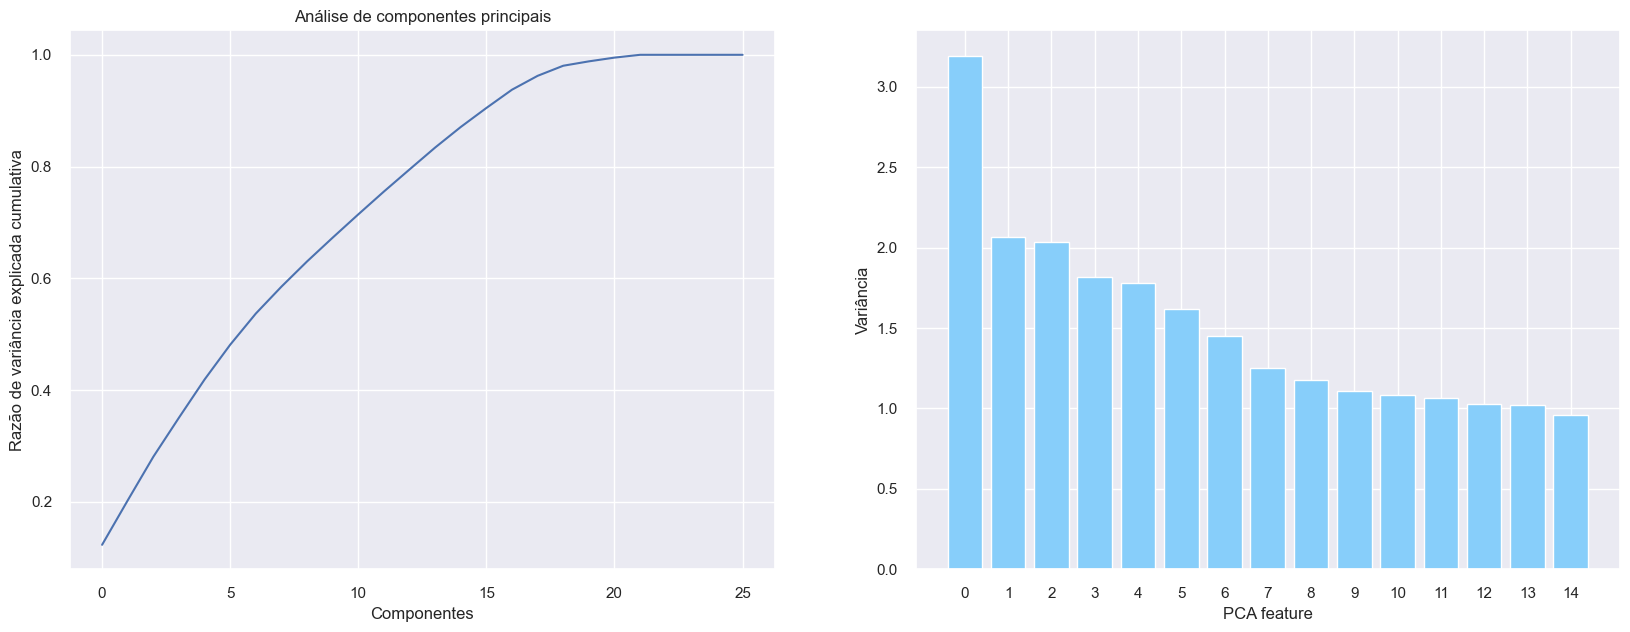

In [354]:
df_pca_tr    = pipeline_processor.fit_transform(X_pipeline, y)
df_pca_ts    = pipeline_processor.transform(X_test)
pca          = PCA(random_state=seed)
pipeline_pca = pca.fit_transform(df_pca_tr)

pca           = ('pca', PCA(random_state=seed))
pipeline_pca  = Pipeline(steps=[('p', pipeline_processor), pca])
Xt            = pipeline_pca.fit_transform(X_pipeline, y);

plt.figure(figsize=(20,7))

features = range(pipeline_pca['pca'].n_components_)
print(':', pipeline_pca['pca'].explained_variance_ratio_.cumsum()[:12].round(2));

plt.subplot(1,2,1)
plt.plot(pipeline_pca['pca'].explained_variance_ratio_.cumsum())
plt.title('Análise de componentes principais')
plt.xlabel('Componentes')
plt.ylabel('Razão de variância explicada cumulativa');


plt.subplot(1,2,2)
plt.bar(features[:15], pipeline_pca['pca'].explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variância')
plt.xticks(features[:15]);

In [355]:
%%time 

n_components  = 1
pca_feats     = [f'fe_pca_{i}' for i in range(n_components)]
pca           = ('pca', PCA(n_components=n_components, random_state=seed))
pipeline_pca  = Pipeline(steps=[('p', pipeline_processor), pca])

df_pca = pd.DataFrame(pipeline_pca.fit_transform(X_pipeline, y), columns=pca_feats)
df_pca.head()

CPU times: total: 109 ms
Wall time: 56 ms


,fe_pca_0
0,1.342297
1,2.396454
2,1.654040
3,-0.750246
4,-3.335571


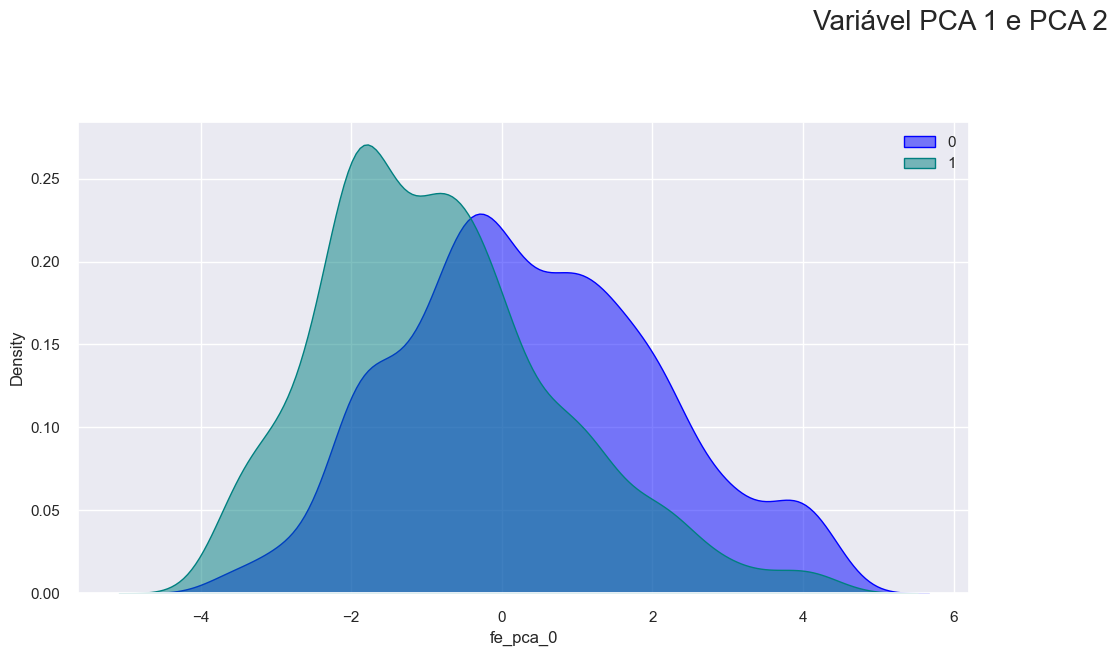

In [356]:
plt.figure(figsize=(20,7))

_ = df_pca.copy() 
_[target] = y 

for i,feature in enumerate(pca_feats):
    plt.subplot(1,2,i+1)
    sns.kdeplot(_[_[target]==0][feature],color='blue', alpha=0.5, label='0', shade=True)
    sns.kdeplot(_[_[target]==1][feature],color='teal', alpha=0.5, label='1', shade=True)  
    plt.xlabel(feature, fontsize=12)
    plt.legend()
         
plt.suptitle('Variável PCA 1 e PCA 2', fontsize=20)
plt.tight_layout(pad=3.0);

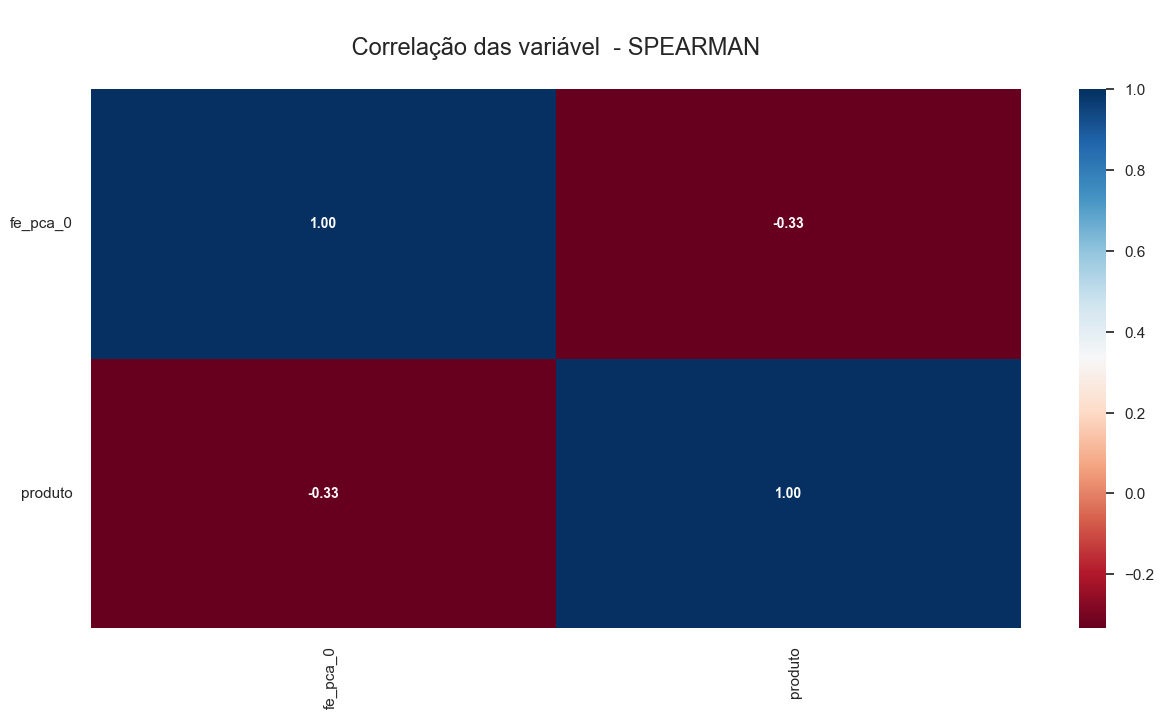

In [357]:
plt.figure(figsize=(15,7))
feature_corr = \
    utility.graf_feature_corr(df_         = _,                             
                              annot_      = True, 
                              threshold_  = .8, 
                              print_var_  = False, 
                              print_graf_ = True, 
                              mask_       = False, 
                              method_     = 'spearman');

In [358]:
X_pipeline_pca      = X_pipeline.copy()
X_test_pipeline_pca = X_test_pipeline.copy()

X_pipeline_pca[pca_feats]      = pipeline_pca.transform(X_pipeline)
X_test_pipeline_pca[pca_feats] = pipeline_pca.transform(X_test_pipeline_pca)

X_pipeline_pca.head()

,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,mês,dia,duração,ncontatos,anterior,idade_group,fe_pca_0
0,escritório,casado(a),ensino médio,não,não,não,telefone fixo,junho,quinta-feira,média,1,nenhum,Acima_35_e_Menor_Igual_45,1.342401
1,trabalhador manual,casado(a),básico,NaN,não,não,telefone móvel,julho,terça-feira,média,4,nenhum,Entre_24_35,2.396623
2,especialista,casado(a),NaN,não,sim,não,telefone fixo,maio,segunda-feira,longa,1,nenhum,Acima_45_e_Menor_Igual_55,1.654042
3,especialista,solteiro(a),NaN,não,não,não,telefone móvel,outubro,terça-feira,longa,1,nenhum,Entre_24_35,-0.750118
4,escritório,solteiro(a),ensino técnico,não,NaN,NaN,telefone móvel,junho,quinta-feira,média,1,apenas um,Entre_24_35,-3.335624


In [359]:
num_transformer = Pipeline(steps=[    
    ('imputer', SimpleImputer(strategy='median')),
    #('featre_pca',ordEncoder)
])

processor_pca =ColumnTransformer(
    transformers=[            
        ('ord', categorical_ord_transformer, cols_ord),
        ('cat', categorical_transformer, cols_oho),
        ('num', num_transformer, pca_feats)
        ], 
    remainder='drop', 
    sparse_threshold=0.3
    )

# Pipelne 
pipeline_processor_pca = Pipeline(steps=[
    ('processor',processor_pca),
     variancethreshold, 
     selectpercentile, 
     scaler])


pipeline_xgb_pca = Pipeline(steps=[
    ('processor', pipeline_processor_pca),
    ('model', model_xgb)
])

pipeline_xgb_pca

Pipeline(steps=[('processor',
                 Pipeline(steps=[('processor',
                                  ColumnTransformer(transformers=[('ord',
                                                                   Pipeline(steps=[('imp',
                                                                                    SimpleImputer(fill_value='No '
                                                                                                             'Data',
                                                                                                  strategy='constant')),
                                                                                   ('Ord',
                                                                                    OrdinalEncoder())]),
                                                                   ['educação',
                                                                    'mês',
                                                                    'dia',
                                                                    'duração',
                                                                    'idade_group']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imp',
                                                                                    SimpleImputer(fill_value='No '
                                                                                                             'Data',
                                                                                                  strategy='constant')),
                                                                                   ('OHen'...
                               eval_metric=['error', 'logloss'], gamma=0,
                               gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=4, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=500, n_jobs=-1, num_parallel_tree=1,
                               predictor='auto', random_state=12359,
                               reg_alpha=0, reg_lambda=100, ...))])

In [363]:
%%time 

models = [('XGB-1', pipeline_xgb_pca, 1, 'xgb_nb_04_pipe_line', pipeline_processor_pca, 15), 
          ('XGB-1', model_xgb   , 4, 'xgb_nb_03', pipeline_processor_pca, 15)
         ]
    
mdl_list_fit, df_pred_tr, df_pred_ts, df_score_mdl = \
    model_cv_fit(models_       = models, 
                 X_            = X_pipeline_pca,
                 y_            = y, 
                 X_test_       = X_test_pipeline_pca,                  
                 path_         = path, 
                 seed_         = seed,
                 target_       = target,
                 create_sub_   = True, 
                 n_splits_     = 10,
                 print_report_ = True, 
                 #model_feature_= [model_xgb, pipeline_processor]
                )
# F1-score: 0.72773 - F1-Train: 0.73477 - L.Loss: 0.43574 - 0h 0m 3s
# F1-score: 0.72836 - F1-Train: 0.76983 - L.Loss: 0.42566 - 0h 0m 11s


=> XGB-1
Fold 1 => F1-score: 0.76168 - F1-Train: 0.77205 - AUC:0.83148 - L.Loss: 0.39016 - 0h 0m 1s
Fold 2 => F1-score: 0.72897 - F1-Train: 0.77400 - AUC:0.80377 - L.Loss: 0.40343 - 0h 0m 1s
Fold 3 => F1-score: 0.73903 - F1-Train: 0.76768 - AUC:0.81304 - L.Loss: 0.42282 - 0h 0m 1s
Fold 4 => F1-score: 0.69488 - F1-Train: 0.77424 - AUC:0.77622 - L.Loss: 0.45736 - 0h 0m 1s
Fold 5 => F1-score: 0.74194 - F1-Train: 0.76424 - AUC:0.81447 - L.Loss: 0.40588 - 0h 0m 1s
Fold 6 => F1-score: 0.71082 - F1-Train: 0.76950 - AUC:0.78947 - L.Loss: 0.43842 - 0h 0m 1s
Fold 7 => F1-score: 0.74545 - F1-Train: 0.76469 - AUC:0.81842 - L.Loss: 0.40540 - 0h 0m 1s
Fold 8 => F1-score: 0.71588 - F1-Train: 0.77370 - AUC:0.79342 - L.Loss: 0.46802 - 0h 0m 1s
Fold 9 => F1-score: 0.71179 - F1-Train: 0.77320 - AUC:0.79079 - L.Loss: 0.44823 - 0h 0m 1s
Fold 10 => F1-score: 0.73318 - F1-Train: 0.76496 - AUC:0.80658 - L.Loss: 0.41694 - 0h 0m 1s
-------------------------------------------------------------------------------

,score
XGB-1,0.72836
XGB-1,0.72507



CPU times: total: 1min 56s
Wall time: 16.4 s


### 3.3.2. Criação dos clustering

In [377]:
X_pipeline_cluster      = X_pipeline_pca.copy()
X_test_pipeline_cluster = X_test_pipeline_pca.copy()

### 3.2.3. Com todas as variáveis

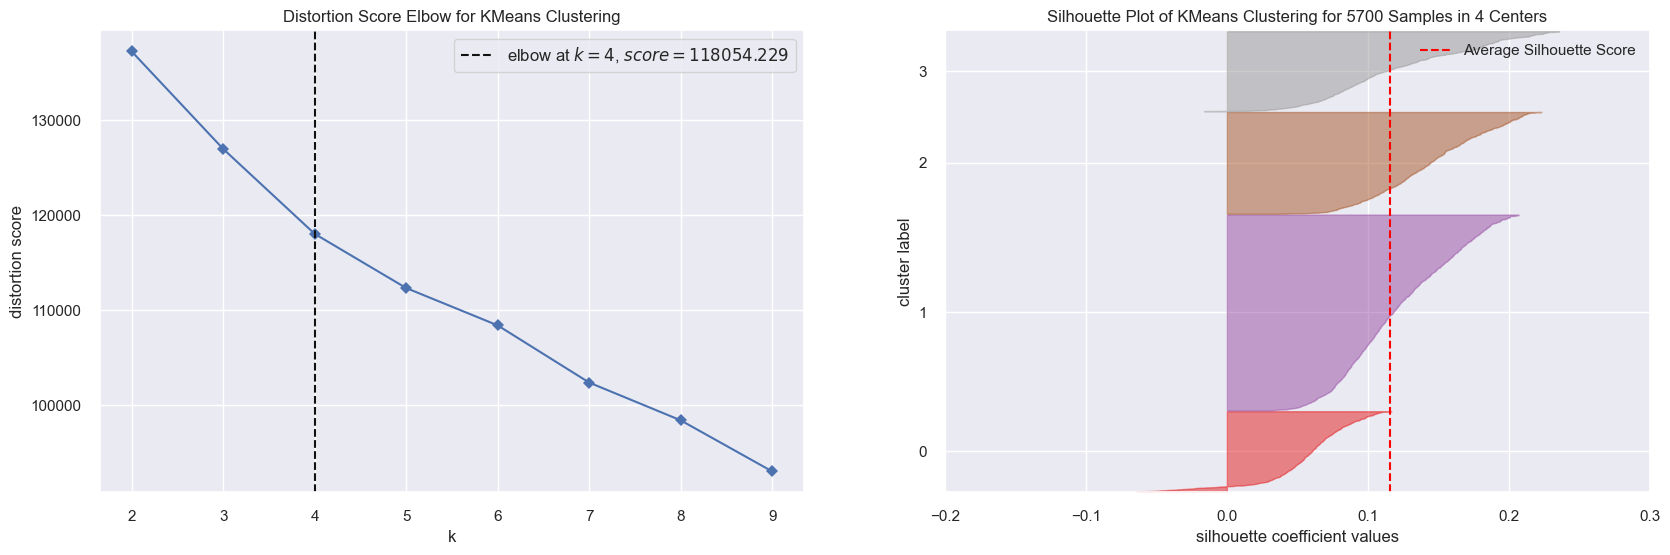

CPU times: total: 7.44 s
Wall time: 2.17 s


<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 5700 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [378]:
%%time 

_ = pd.DataFrame(pipeline_processor_pca.fit_transform(X_pipeline_pca, y))

f1, axs1 = plt.subplots(1,2,figsize=(20,6)) 

visualizer = KElbowVisualizer(KMeans(random_state=seed), k=(2,10), timings=False, ax=axs1[0])
visualizer.fit(_.values)
visualizer.finalize() 

k       = visualizer.elbow_value_
model_1 = KMeans(k, random_state=seed)
sv      = SilhouetteVisualizer(model_1, ax=axs1[1])

sv.fit(_)
sv.show();

### 3.2.4. Com a variável PCA

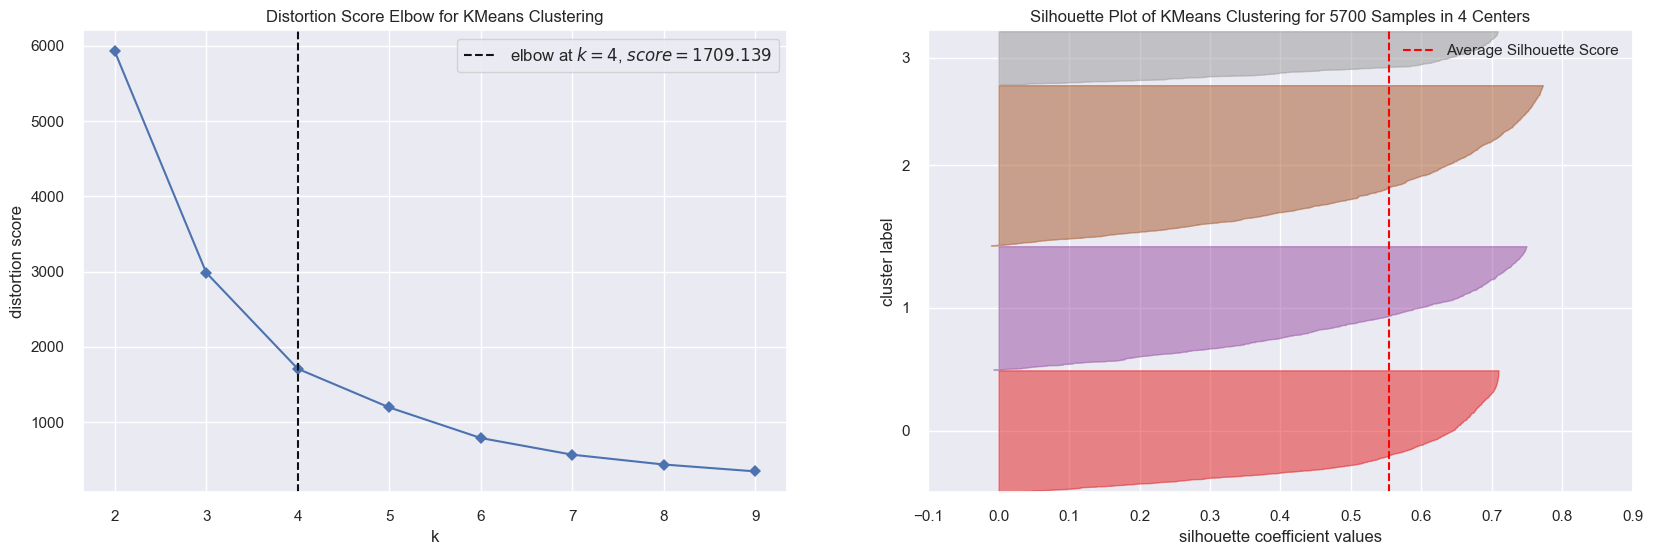

CPU times: total: 4.75 s
Wall time: 1.71 s


<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 5700 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [381]:
%%time 

_ = X_pipeline_pca[pca_feats] # 

f1, axs1 = plt.subplots(1,2,figsize=(20,6)) 

visualizer = KElbowVisualizer(KMeans(random_state=seed), k=(2,10), timings=False, ax=axs1[0])
visualizer.fit(_.values)
visualizer.finalize() 

k       = visualizer.elbow_value_
model_2 = KMeans(k, random_state=seed)
sv      = SilhouetteVisualizer(model_1, ax=axs1[1])

sv.fit(_)
sv.show();


<div class="alert alert-block alert-info" style="border-radius:15px">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Utilizando PCA temos os clusters com melhor silhjouette e melhor distribuições em relação ao utilizar todas as variáveis para gera os clusters. 
    
Vamos gerar os clusters nos dados de treino e teste.
    
</div>

In [437]:
%%time 

model_2.fit(X_pipeline_cluster[pca_feats])

X_pipeline_cluster['fe_cluster_kmeans']      = model_2.predict(X_pipeline_cluster[pca_feats])
X_test_pipeline_cluster['fe_cluster_kmeans'] = model_2.predict(X_test_pipeline_cluster[pca_feats])

CPU times: total: 297 ms
Wall time: 53 ms


In [412]:
_  = pd.DataFrame(pipeline_processor_pca.fit_transform(X_pipeline_pca, y))
_.columns =  [f'col_{i}' for i in range(_.shape[1])]
_['fe_cluster_kmeans'] = X_pipeline_cluster['fe_cluster_kmeans'] 

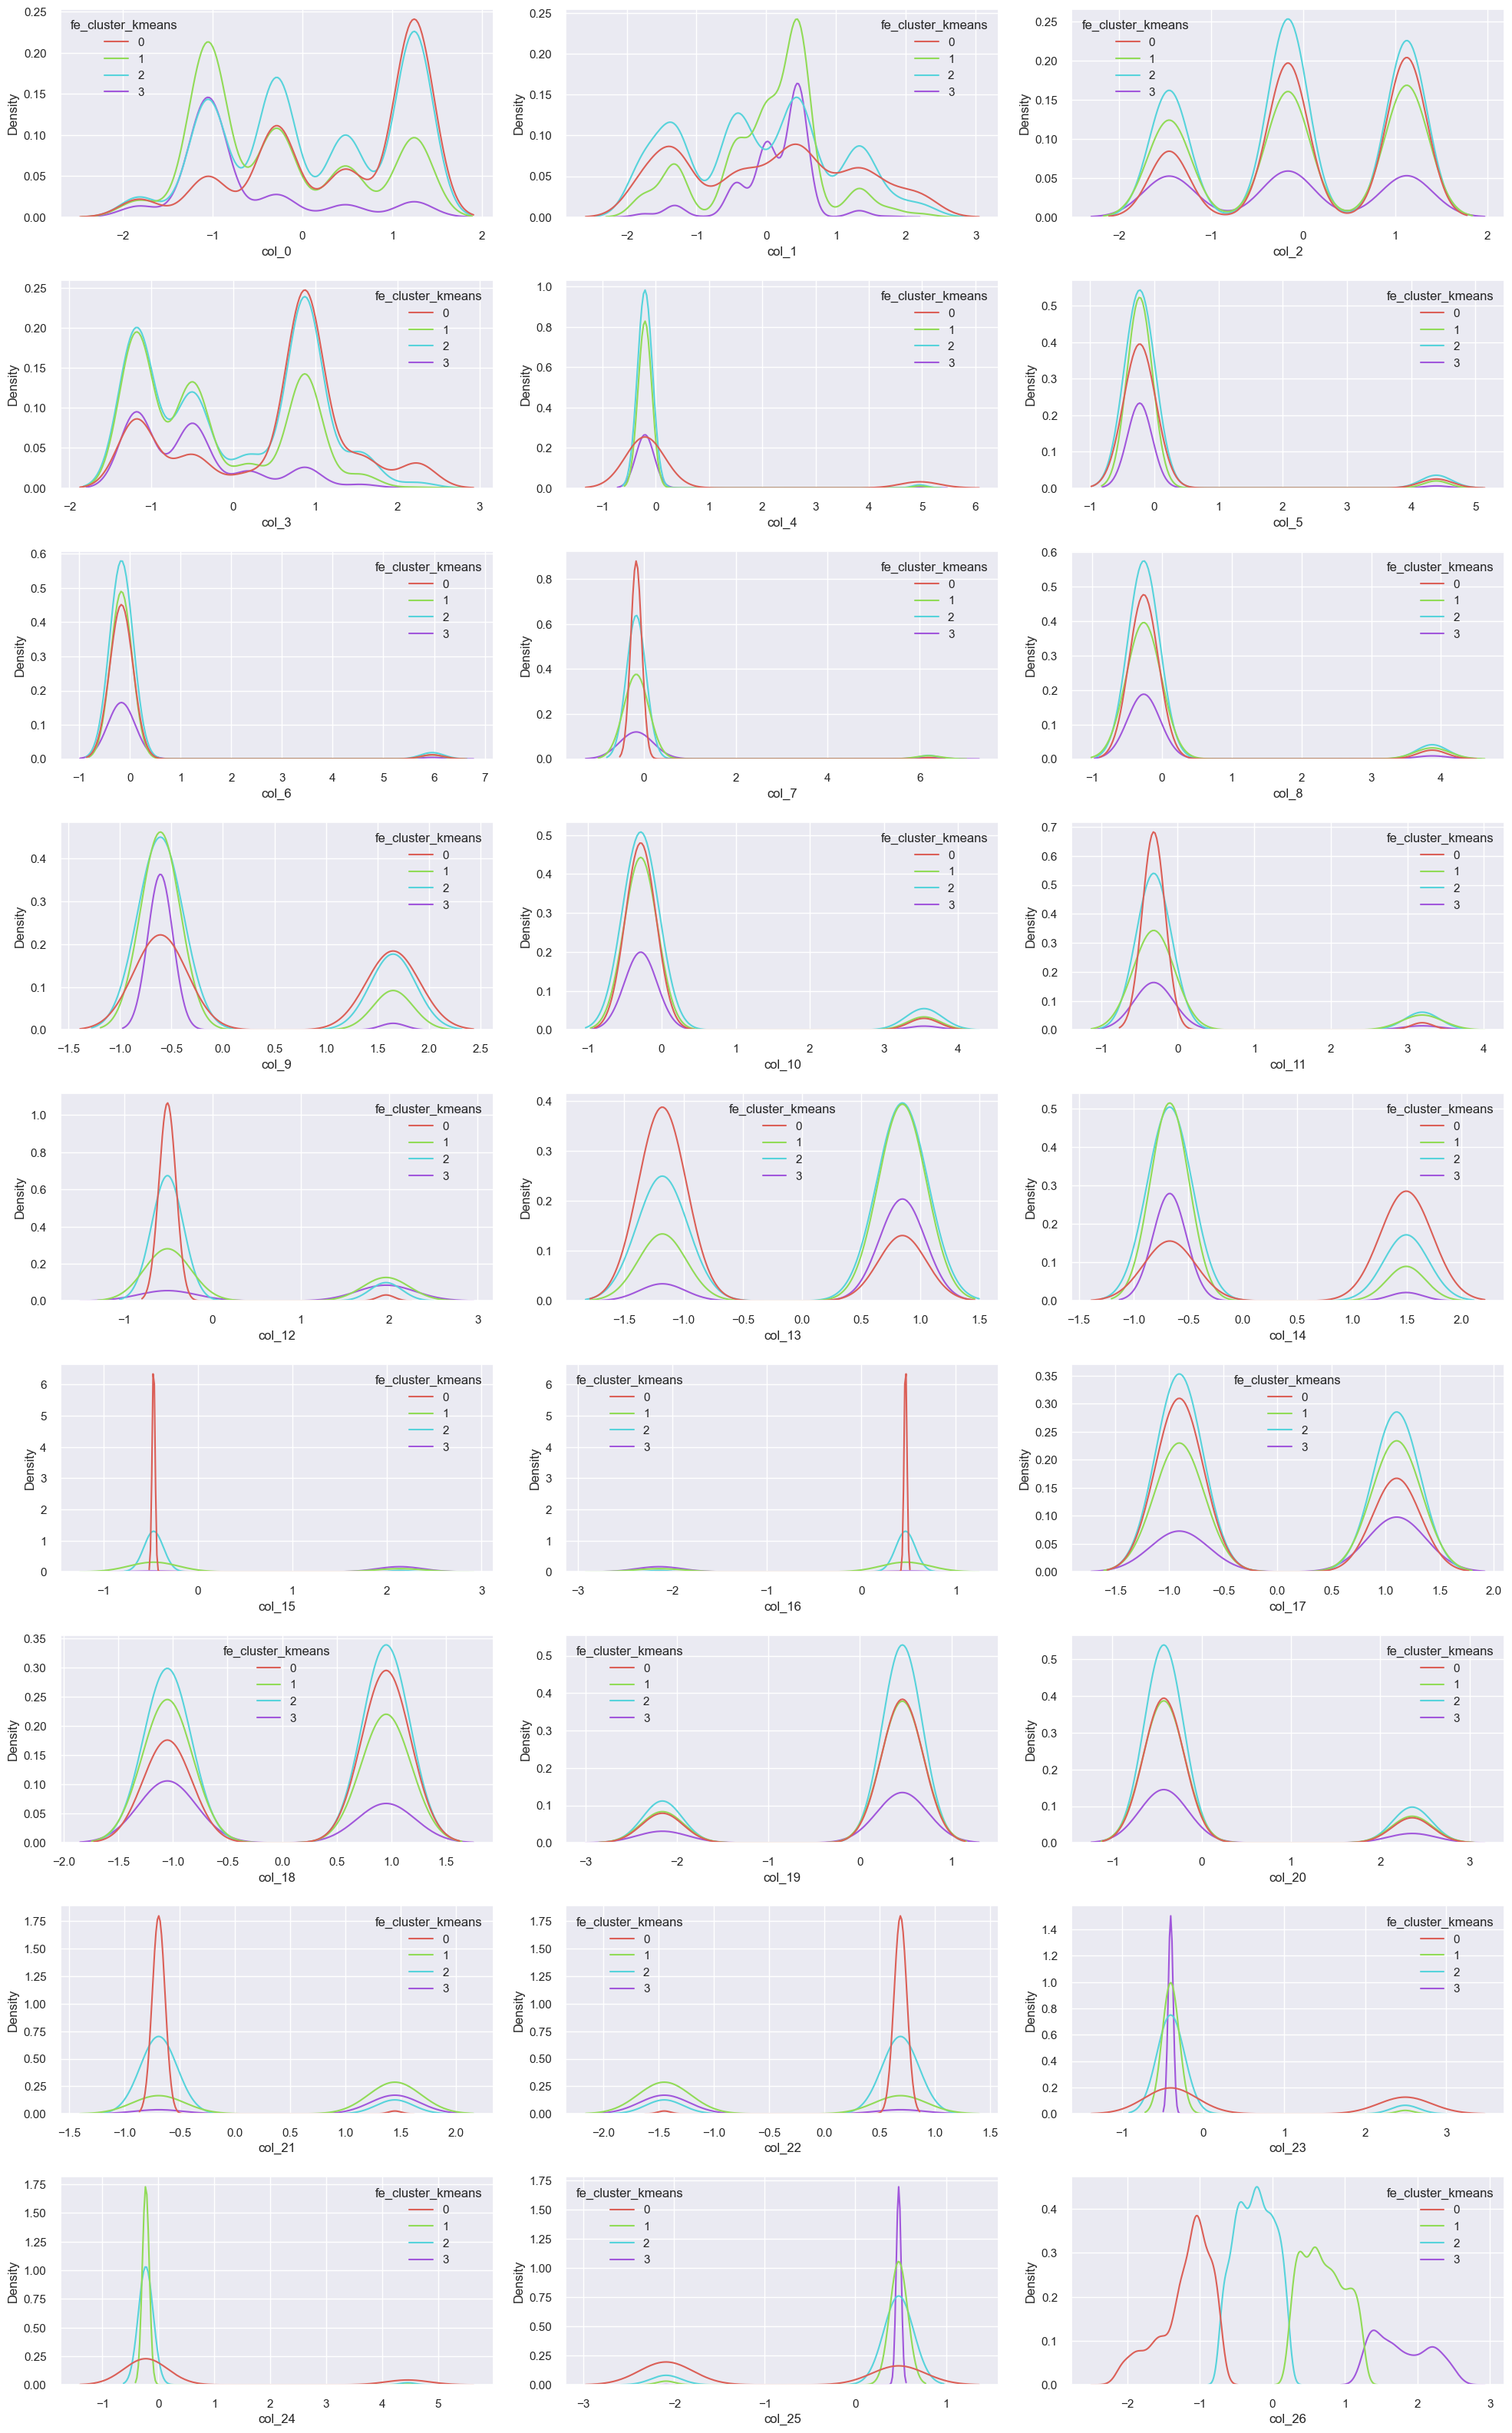

In [413]:
feature_sample = _.columns.to_list()
feature_sample.remove('fe_cluster_kmeans')
row            = int(len(feature_sample)/3) + 1

f,ax = plt.subplots(figsize=(20,35))

for i, feature in enumerate(feature_sample):
    plt.subplot(row, 3 , i+1)
    sns.kdeplot(data=_, x=feature, hue="fe_cluster_kmeans", palette=sns.color_palette("hls", k));
    
plt.tight_layout(pad=1.5);

In [417]:
%%time 
model_bgmm = BayesianGaussianMixture(n_components    = k, 
                                     covariance_type = 'full', 
                                     n_init          = 3,
                                     init_params     = "kmeans",
                                     random_state    = seed) 

model_bgmm.fit(X_pipeline_cluster[pca_feats])

X_pipeline_cluster['fe_cluster_bgmm_pca']      = model_bgmm.predict(X_pipeline_cluster[pca_feats])
X_test_pipeline_cluster['fe_cluster_bgmm_pca'] = model_bgmm.predict(X_test_pipeline_cluster[pca_feats])


CPU times: total: 4.33 s
Wall time: 855 ms


<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Com a criação da variável cluster, tivemos uma melhora no score e a variável se posicionou entre as 10. 
    
</div>

In [418]:
feature_corr = ['fe_pca_0','fe_cluster_kmeans', 'fe_cluster_bgmm_pca', target]

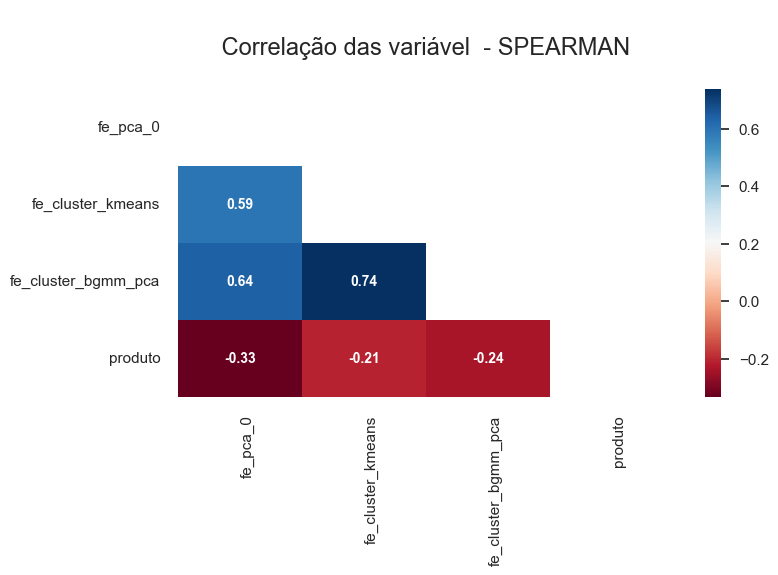

In [419]:
plt.figure(figsize=(8,4))
_ = X_pipeline_cluster.copy() 
_[target] = y

feature_corr = \
    utility.graf_feature_corr(df_         = _[feature_corr],
                              annot_      = True, 
                              threshold_  = .8, 
                              print_var_  = False, 
                              print_graf_ = True, 
                              mask_       = True, 
                              method_     = 'spearman');

In [441]:
X_pipeline_cluster.drop('fe_cluster_kmeans', axis=1, inplace=True)     
X_test_pipeline_cluster.drop('fe_cluster_kmeans', axis=1, inplace=True)

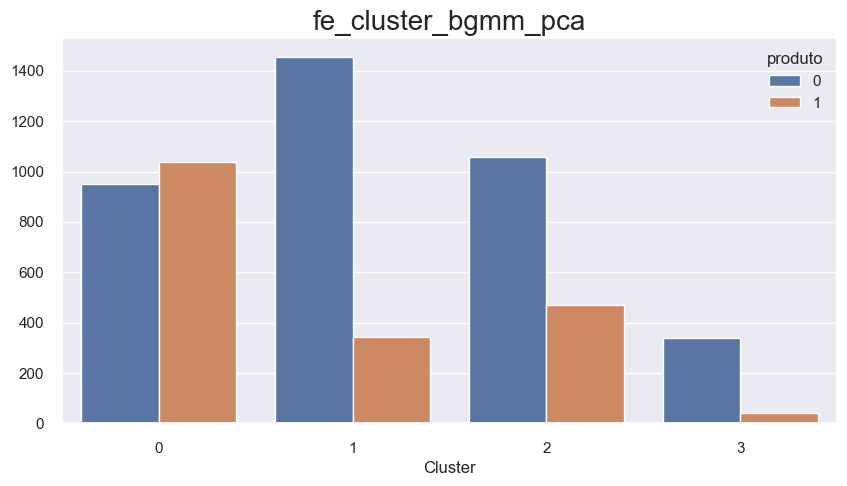

In [444]:
_         =  X_pipeline_cluster
_[target] =  y
_


sns.set(style="darkgrid")
plt.figure(figsize=(10,5))


sns.countplot(data=_, x='fe_cluster_bgmm_pca', hue=target)
plt.title('fe_cluster_bgmm_pca', fontsize=20)
plt.xlabel('Cluster')
plt.ylabel('');


### 2.2.4. Transformar em One Hot Encoder

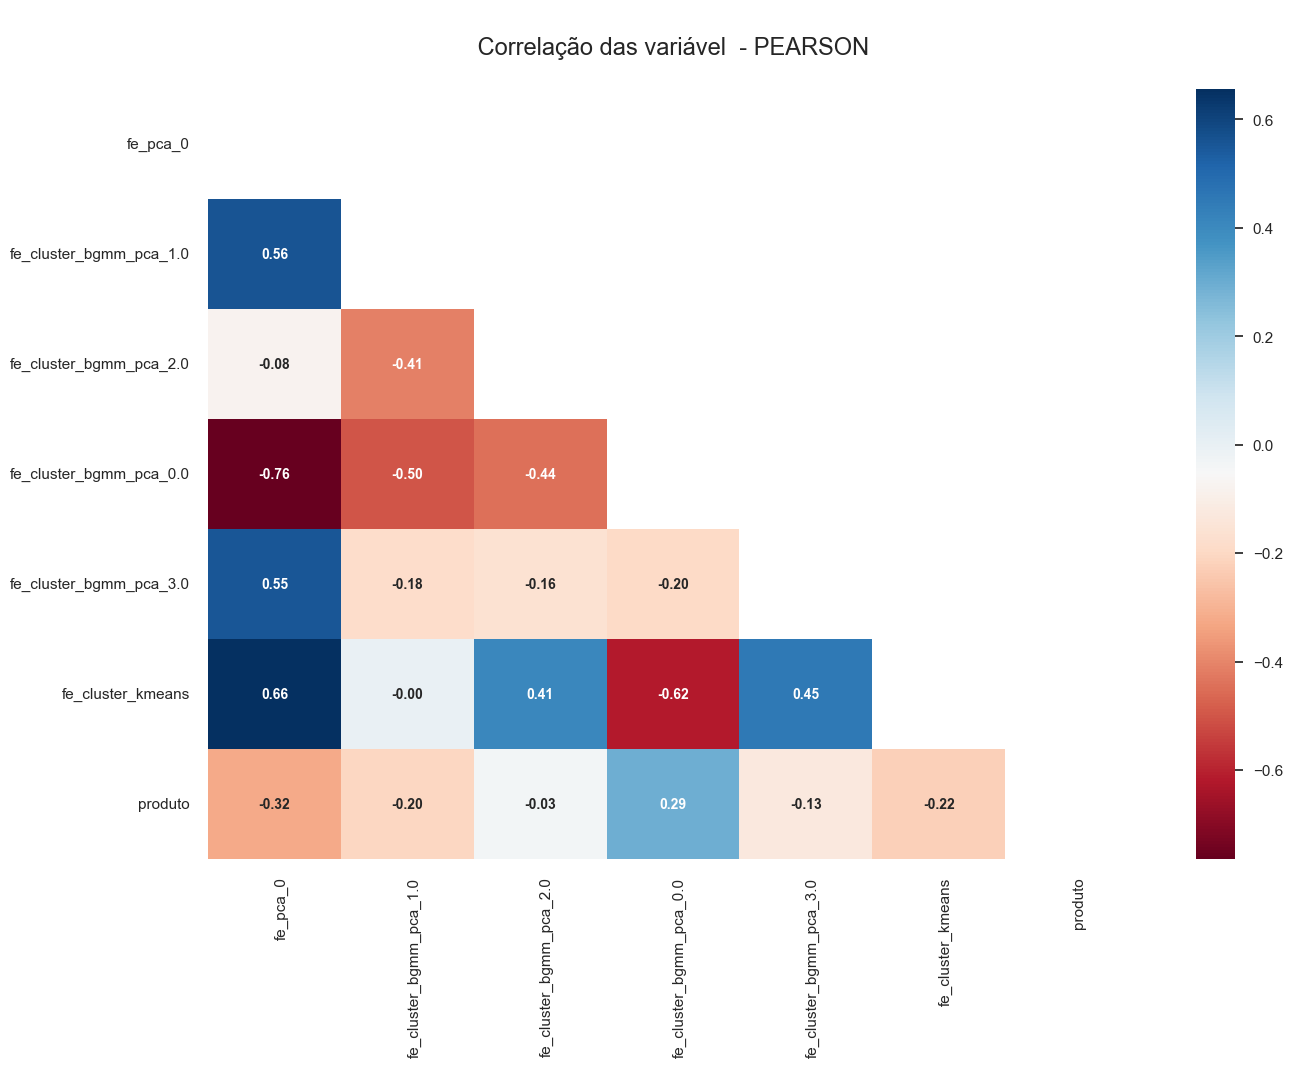

In [440]:
encoder = ce.OneHotEncoder(cols           = ['fe_cluster_bgmm_pca' ],
                           handle_unknown = 'return_nan',
                           return_df      = True,
                           use_cat_names  = True)

encoder.fit(X_pipeline_cluster)

_            = encoder.fit_transform(X_pipeline_cluster)
_[target]    = y
feature_corr = _.filter(regex=r'fe_').columns.to_list()

plt.figure(figsize=(15,10))
feature_corr = \
    utility.graf_feature_corr(df_         = _[feature_corr+ [target]],
                              annot_      = True, 
                              threshold_  = .8, 
                              print_var_  = False, 
                              print_graf_ = True, 
                              mask_       = True, );

# 4. Modelagem 

In [460]:
X      = X_pipeline_cluster.copy() 
X_test = X_test_pipeline_cluster.copy()

## 4.1 Pipeline 

In [477]:
num_transformer = Pipeline(steps=[    
    ('imputer', SimpleImputer(strategy='median')),
    #('featre_pca',ordEncoder)
])

processor_final =ColumnTransformer(
    transformers=[            
        ('ord', categorical_ord_transformer, cols_ord),
        ('cat', categorical_transformer, cols_oho+['fe_cluster_bgmm_pca' ] ),
        ('num', num_transformer, pca_feats) 
        ], 
    remainder='drop', 
    sparse_threshold=0.3
    )

# Pipelne 
pipeline_processor_final = Pipeline(steps=[
    ('processor',processor_final),
     variancethreshold, 
     selectpercentile, 
     scaler])

pipeline_xgb_final = Pipeline(steps=[
    ('processor', pipeline_processor_final),
    ('model', model_xgb)
])

pipeline_xgb_final

Pipeline(steps=[('processor',
                 Pipeline(steps=[('processor',
                                  ColumnTransformer(transformers=[('ord',
                                                                   Pipeline(steps=[('imp',
                                                                                    SimpleImputer(fill_value='No '
                                                                                                             'Data',
                                                                                                  strategy='constant')),
                                                                                   ('Ord',
                                                                                    OrdinalEncoder())]),
                                                                   ['educação',
                                                                    'mês',
                                                                    'dia',
                                                                    'duração',
                                                                    'idade_group']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imp',
                                                                                    SimpleImputer(fill_value='No '
                                                                                                             'Data',
                                                                                                  strategy='constant')),
                                                                                   ('OHen'...
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=500, n_jobs=-1,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, reg_alpha=None,
                               reg_lambda=100, ...))])

In [478]:
_ = pipeline_processor_final.fit_transform(X, y)
_

array([[-0.28601221,  0.01020251,  1.12602174, ..., -0.60545748,
        -0.26688427,  0.75152409],
       [-1.05139701, -0.43036052,  1.12602174, ..., -0.60545748,
        -0.26688427,  1.3417154 ],
       [-1.81678181,  0.45076555, -0.16383435, ..., -0.60545748,
        -0.26688427,  0.92599209],
       ...,
       [ 1.24475739, -0.87092356, -0.16383435, ..., -0.60545748,
        -0.26688427, -1.81928479],
       [-1.05139701,  0.45076555, -0.16383435, ..., -0.60545748,
         3.74694247,  2.40583699],
       [ 1.24475739,  1.77245466,  1.12602174, ...,  1.65164365,
        -0.26688427, -0.40766775]])

## 4.2. Treinamento

In [479]:
%%time 

models = [('XGB-1', pipeline_xgb_final, 1, 'xgb_fe_06_pipe_line', pipeline_processor_final, 15), 
          ('XGB-2', model_xgb   , 4, 'xgb_fe_07_pipe_line', pipeline_processor_final, 15)
         ]
    
mdl_list_fit, df_pred_tr, df_pred_ts, df_score_mdl = \
    model_cv_fit(models_       = models, 
                 X_            = X,
                 y_            = y, 
                 X_test_       = X_test,                  
                 path_         = path, 
                 seed_         = seed,
                 target_       = target,
                 create_sub_   = True, 
                 n_splits_     = 10,
                 print_report_ = True, 
                 #model_feature_= [model_xgb, pipeline_processor]
                )
# F1-score: 0.72773 - F1-Train: 0.73477 - L.Loss: 0.43574 - 0h 0m 3s
# F1-score: 0.72836 - F1-Train: 0.76983 - L.Loss: 0.42566 - 0h 0m 11s
# F1-score: 0.72939 - F1-Train: 0.77013 - L.Loss: 0.42707 - 0h 0m 13s


=> XGB-1
Fold 1 => F1-score: 0.76526 - F1-Train: 0.76985 - AUC:0.83410 - L.Loss: 0.39322 - 0h 0m 1s
Fold 2 => F1-score: 0.73364 - F1-Train: 0.77202 - AUC:0.80773 - L.Loss: 0.40396 - 0h 0m 1s
Fold 3 => F1-score: 0.73953 - F1-Train: 0.76865 - AUC:0.81302 - L.Loss: 0.42803 - 0h 0m 1s
Fold 4 => F1-score: 0.68904 - F1-Train: 0.77504 - AUC:0.77092 - L.Loss: 0.46008 - 0h 0m 1s
Fold 5 => F1-score: 0.74419 - F1-Train: 0.76812 - AUC:0.81579 - L.Loss: 0.40649 - 0h 0m 1s
Fold 6 => F1-score: 0.71429 - F1-Train: 0.77144 - AUC:0.79211 - L.Loss: 0.43689 - 0h 0m 1s
Fold 7 => F1-score: 0.74545 - F1-Train: 0.76387 - AUC:0.81842 - L.Loss: 0.40691 - 0h 0m 1s
Fold 8 => F1-score: 0.71171 - F1-Train: 0.77460 - AUC:0.78947 - L.Loss: 0.46888 - 0h 0m 1s
Fold 9 => F1-score: 0.71179 - F1-Train: 0.77086 - AUC:0.79079 - L.Loss: 0.44993 - 0h 0m 1s
Fold 10 => F1-score: 0.73903 - F1-Train: 0.76686 - AUC:0.81184 - L.Loss: 0.41636 - 0h 0m 1s
-------------------------------------------------------------------------------

,score
XGB-1,0.72939
XGB-2,0.72369



CPU times: total: 2min 3s
Wall time: 17.9 s


## 4.3. Tunning

In [484]:
%%time 

params_xgb  = {
    'max_depth'     : [4, 5, 7],
    'n_estimators'  : [100, 250, 500, 1000],        
    'learning_rate' : [.1, .01, .001, .005], 
    'reg_lambda'    : [30, 50, 100, 200]
    }
        
model_xgb = xgb.XGBClassifier(
    objective        = 'binary:logistic', 
    eval_metric      = 'logloss',
    colsample_bytree = .75,    
    subsample        = .8,
    #reg_lambda       = 50,    
    scale_pos_weight = scale_pos_weight,
    use_label_encoder= False, 
    tree_method      = 'gpu_hist',
    predictor        = 'gpu_predictor', 
    random_state     = seed
)
     

# Usando o constructor para criar o objeto sss
sss = StratifiedShuffleSplit(n_splits     = 5,       # 5 simulações.
                             test_size    = 0.2,     # 20% do dataset será de testes.
                             random_state = seed)    # Permitir a reprodutibilidade.


# Criando um dicionário com as métricas que desejo calcular.
meus_scores = {'accuracy' : make_scorer(accuracy_score),
               'recall'   : make_scorer(recall_score),
               'precision': make_scorer(precision_score),
               'f1'       : make_scorer(fbeta_score, beta=1), 
               'logloss'  : make_scorer(log_loss)}

gs_cv  = []
models = [(model_xgb, params_xgb, 'XGB' )]
   
_ = pipeline_processor_final.fit_transform(X, y)

for mdl in models:
    gs = GridSearchCV(estimator          = mdl[0], 
                      param_grid         = mdl[1], 
                      scoring            = meus_scores,
                      refit              = 'f1',
                      cv                 = sss, 
                      return_train_score = True,
                      n_jobs             = -1)
  
    gs.fit(_, y)

    print("Best parameters for {}: {}".format(mdl[2], gs.best_params_))   
    print()
    gs_cv.append([(mdl[2], gs)])

KeyboardInterrupt: 

In [485]:
counter          = Counter(y)
scale_pos_weight = (counter[0]/counter[1]) 

params_xgb  = {
    'objective'        : 'binary:logistic', 
    'eval_metric'      : ['error', 'logloss'],
    'max_depth'        : 7, 
    'scale_pos_weight' : scale_pos_weight,
    'n_estimators'     : 1000,    
    'learning_rate'    : .01,
    'colsample_bytree' : .75,    
    'subsample'        : .8,
    'reg_lambda'       : 30,
    'n_jobs'           : -1,    
    'seed'             : seed}
    
if torch.cuda.is_available():           
    params_xgb.update({'tree_method': 'gpu_hist','predictor': 'gpu_predictor'})

# Classificadores
model_xgb  = xgb.XGBClassifier(**params_xgb)

pipeline_xgb_final_tunning = Pipeline(steps=[
    ('processor', pipeline_processor_final),
    ('model', model_xgb)
])

In [486]:
%%time 

models = [('XGB-1', pipeline_xgb_final_tunning, 1, 'xgb_fe_07_pipe_line', pipeline_processor_final, 15), 
          ('XGB-2', model_xgb   , 4, 'xgb_fe_08_pipe_line', pipeline_processor_final, 15)
         ]
    
mdl_list_fit, df_pred_tr, df_pred_ts, df_score_mdl = \
    model_cv_fit(models_       = models, 
                 X_            = X,
                 y_            = y, 
                 X_test_       = X_test,                  
                 path_         = path, 
                 seed_         = seed,
                 target_       = target,
                 create_sub_   = True, 
                 n_splits_     = 10,
                 print_report_ = True, 
                 #model_feature_= [model_xgb, pipeline_processor]
                )
# F1-score: 0.72773 - F1-Train: 0.73477 - L.Loss: 0.43574 - 0h 0m 3s
# F1-score: 0.72836 - F1-Train: 0.76983 - L.Loss: 0.42566 - 0h 0m 11s
# F1-score: 0.72939 - F1-Train: 0.77013 - L.Loss: 0.42707 - 0h 0m 13s


=> XGB-1
Fold 1 => F1-score: 0.75991 - F1-Train: 0.77345 - AUC:0.83017 - L.Loss: 0.39330 - 0h 0m 3s
Fold 2 => F1-score: 0.72897 - F1-Train: 0.77942 - AUC:0.80377 - L.Loss: 0.40338 - 0h 0m 3s
Fold 3 => F1-score: 0.74483 - F1-Train: 0.77733 - AUC:0.81834 - L.Loss: 0.41875 - 0h 0m 3s
Fold 4 => F1-score: 0.69912 - F1-Train: 0.78182 - AUC:0.78019 - L.Loss: 0.45535 - 0h 0m 3s
Fold 5 => F1-score: 0.74246 - F1-Train: 0.77234 - AUC:0.81447 - L.Loss: 0.40509 - 0h 0m 3s
Fold 6 => F1-score: 0.71335 - F1-Train: 0.77800 - AUC:0.79211 - L.Loss: 0.43244 - 0h 0m 3s
Fold 7 => F1-score: 0.75113 - F1-Train: 0.77565 - AUC:0.82368 - L.Loss: 0.40302 - 0h 0m 3s
Fold 8 => F1-score: 0.71082 - F1-Train: 0.77954 - AUC:0.78947 - L.Loss: 0.46026 - 0h 0m 3s
Fold 9 => F1-score: 0.72885 - F1-Train: 0.77730 - AUC:0.80658 - L.Loss: 0.43963 - 0h 0m 3s
Fold 10 => F1-score: 0.74429 - F1-Train: 0.77778 - AUC:0.81711 - L.Loss: 0.41834 - 0h 0m 3s
-------------------------------------------------------------------------------

,score
XGB-1,0.73237
XGB-2,0.73042



CPU times: total: 7min 29s
Wall time: 1min 2s


In [488]:
df_train_fe = X.copy()
df_test_fe  = X_test.copy() 
df_train_fe[target] = y 

In [491]:
jb.dump(df_train_fe, path + 'Data/pkl/df_train_fe.pkl.z')
jb.dump(df_train_fe, path + 'Data/pkl/df_test_fe.pkl.z');

<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 5. Conclusão </h1>    
</div>



![](img/rank_1.jpg)